In [312]:
%pip install matplotlib pandas numpy seaborn wordcloud

In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta, date
import json
from ast import literal_eval
import ast
import requests
from bs4 import BeautifulSoup
import random
from wordcloud import WordCloud

In [783]:
file_path = "Data/final2.csv"
select = pd.read_csv(file_path)

In [784]:
select['time'] = pd.to_datetime(select['time'])

In [410]:
select['time']

0     2023-11-30 21:15:00
1     2023-11-30 18:15:00
2     2023-11-30 12:15:00
3     2023-11-30 09:15:00
4     2023-11-30 06:15:00
              ...        
225   2023-11-01 11:15:00
226   2023-11-01 08:15:00
227   2023-11-01 08:15:00
228   2023-11-01 03:15:00
229   2023-11-01 01:15:00
Name: time, Length: 230, dtype: datetime64[ns]

Analyzing the time of the posts

In [411]:
daily_post_count = select.groupby(select['time'].dt.date).size()

In [412]:
start_date = select['time'].dt.date.min()
end_date = select['time'].dt.date.max()
all_dates = pd.date_range(start=start_date, end=end_date, freq='D')
daily_post_count = daily_post_count.reindex(all_dates, fill_value=0)

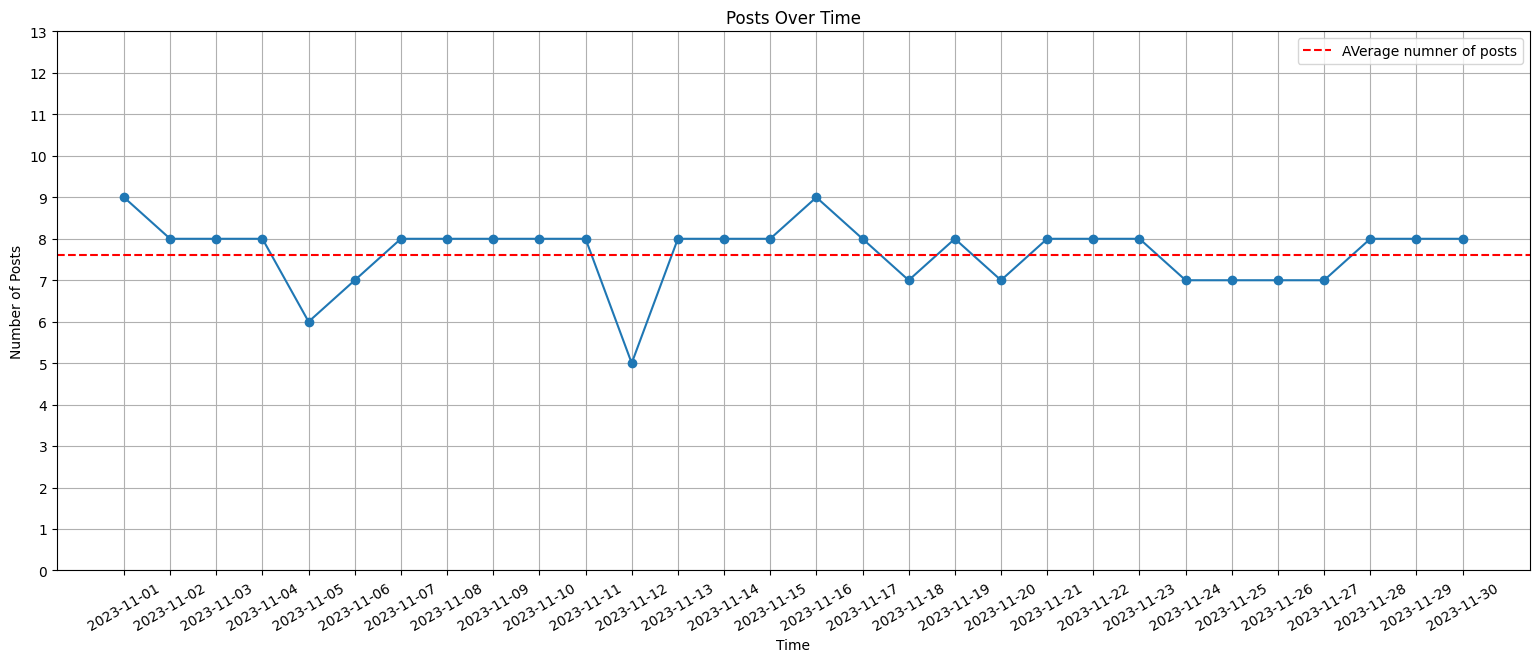

In [413]:
# Vẽ số bài viết theo thời gian
plt.figure(figsize=(19, 7))
plt.plot(daily_post_count.index, daily_post_count.values, marker='o')
plt.xlabel('Time')
plt.ylabel('Number of Posts')
plt.xticks(daily_post_count.index, rotation = 30)
plt.yticks(np.arange(0,daily_post_count.max()+daily_post_count.max()/2))
plt.title('Posts Over Time')
plt.grid(True)
plt.axhline(y=7.6, color='red', linestyle='--', label='AVerage numner of posts')
plt.legend()
plt.show()

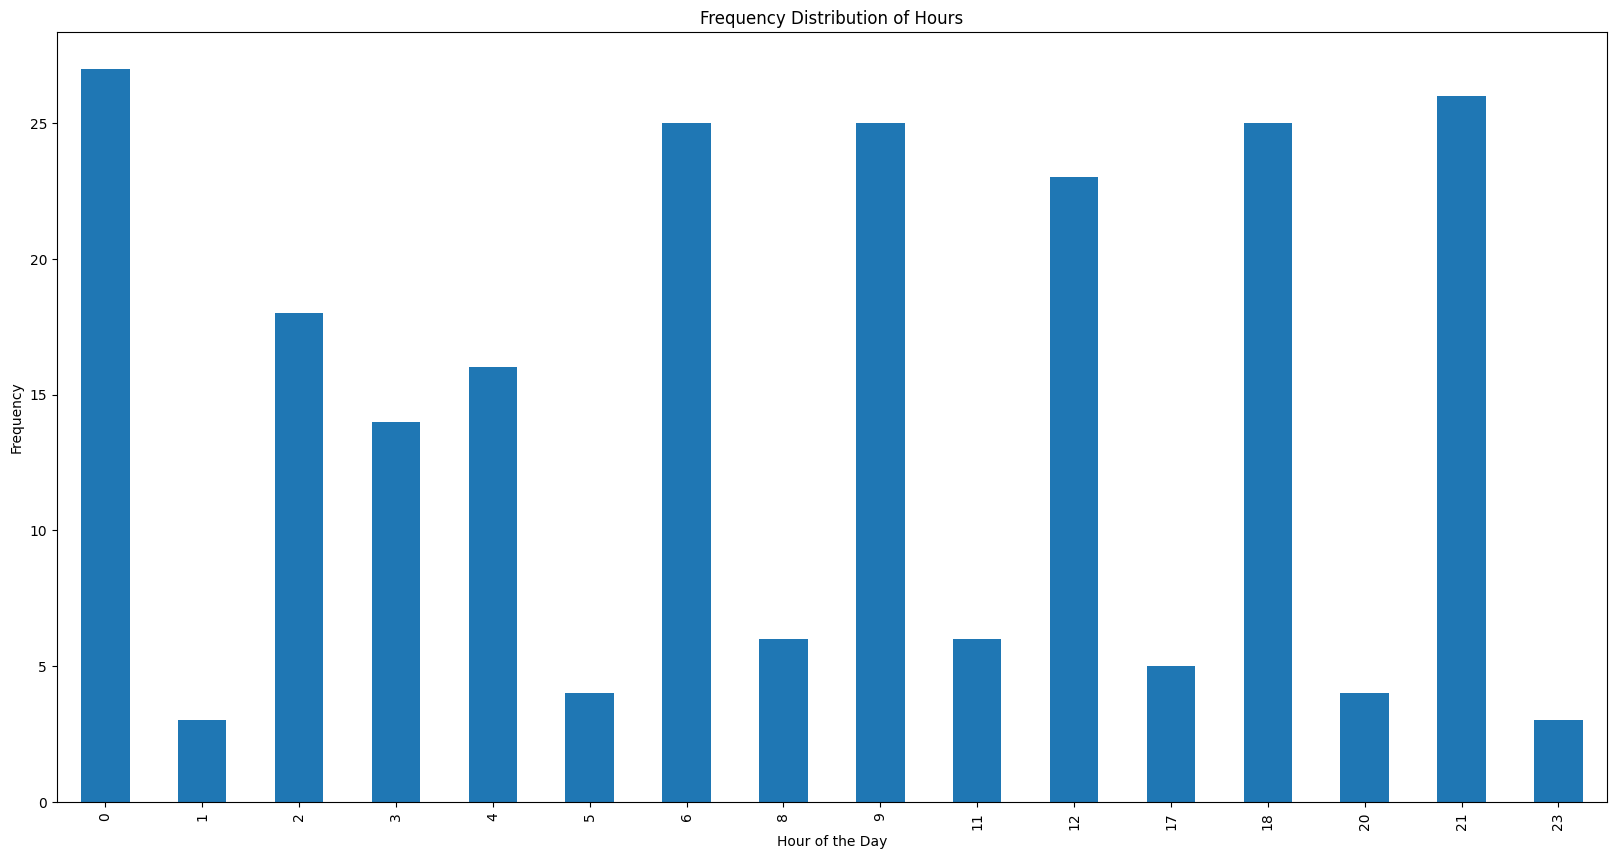

In [414]:
select['hours'] = select['time'].dt.hour
plt.figure(figsize=(20,10))
select['hours'].value_counts().sort_index().plot(kind='bar')

plt.title('Frequency Distribution of Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

In [738]:
result_dict={}

In [739]:
for index,row in select.iterrows():
    day = row['time'].day
    hour = row['time'].hour
    
    
    if day in result_dict:
       
        result_dict[day].append(hour)
    else:
        
        result_dict[day] = [hour]

In [740]:
print(result_dict)

{30: [21, 18, 12, 9, 6, 4, 2, 0], 29: [21, 18, 12, 9, 6, 4, 2, 0], 28: [21, 18, 12, 9, 6, 4, 2, 0], 27: [21, 18, 12, 9, 6, 3, 0], 26: [21, 18, 12, 9, 6, 3, 0], 25: [21, 18, 12, 9, 6, 3, 0], 24: [21, 18, 12, 9, 6, 3, 0], 23: [21, 18, 12, 9, 6, 4, 2, 0], 22: [21, 18, 12, 9, 6, 4, 2, 0], 21: [21, 18, 12, 9, 6, 4, 2, 0], 20: [21, 18, 12, 9, 6, 3, 0], 19: [21, 18, 12, 9, 9, 6, 3, 0], 18: [21, 18, 12, 6, 4, 2, 0], 17: [21, 18, 12, 9, 6, 4, 2, 0], 16: [21, 18, 12, 9, 6, 4, 2, 2, 0], 15: [21, 18, 12, 9, 6, 4, 2, 0], 14: [21, 18, 12, 9, 6, 4, 2, 0], 13: [21, 18, 12, 9, 6, 6, 3, 0], 12: [21, 9, 6, 3, 0], 11: [21, 18, 12, 9, 6, 4, 2, 0], 10: [21, 18, 12, 9, 6, 4, 2, 0], 9: [21, 18, 12, 9, 4, 3, 2, 0], 8: [21, 18, 12, 9, 6, 4, 2, 0], 7: [21, 18, 12, 9, 6, 4, 2, 0], 6: [21, 18, 9, 6, 3, 0, 0], 5: [21, 18, 11, 8, 5, 2], 4: [23, 20, 17, 11, 8, 5, 3, 1], 3: [20, 17, 11, 11, 8, 5, 3, 1], 2: [23, 20, 17, 11, 8, 5, 3, 0], 1: [23, 20, 17, 17, 11, 8, 8, 3, 1]}


In [749]:
data={}

In [750]:
for keys in result_dict:
    a = result_dict[keys]
    if str(a) in data:
        data[str(a)] +=1
    else:
        data[str(a)] = 1

In [751]:
data

{'[21, 18, 12, 9, 6, 4, 2, 0]': 13,
 '[21, 18, 12, 9, 6, 3, 0]': 5,
 '[21, 18, 12, 9, 9, 6, 3, 0]': 1,
 '[21, 18, 12, 6, 4, 2, 0]': 1,
 '[21, 18, 12, 9, 6, 4, 2, 2, 0]': 1,
 '[21, 18, 12, 9, 6, 6, 3, 0]': 1,
 '[21, 9, 6, 3, 0]': 1,
 '[21, 18, 12, 9, 4, 3, 2, 0]': 1,
 '[21, 18, 9, 6, 3, 0, 0]': 1,
 '[21, 18, 11, 8, 5, 2]': 1,
 '[23, 20, 17, 11, 8, 5, 3, 1]': 1,
 '[20, 17, 11, 11, 8, 5, 3, 1]': 1,
 '[23, 20, 17, 11, 8, 5, 3, 0]': 1,
 '[23, 20, 17, 17, 11, 8, 8, 3, 1]': 1}

In [752]:
a = sum(data.values())
a

30

In [753]:
max_key = max(data, key=data.get)
max_value = data[max_key]

# Calculate the total value of all other entries
total_value_others = sum(value for key, value in data.items() if key != max_key)

keys = [max_key, 'còn lại']
value = [max_value,total_value_others]
print(f"The key with the highest value is {max_key} with a value of {max_value}.")
print(f"The total value of all other entries is {total_value_others}.")

The key with the highest value is [21, 18, 12, 9, 6, 4, 2, 0] with a value of 13.
The total value of all other entries is 17.


In [754]:
del data[max_key]

In [755]:
data

{'[21, 18, 12, 9, 6, 3, 0]': 5,
 '[21, 18, 12, 9, 9, 6, 3, 0]': 1,
 '[21, 18, 12, 6, 4, 2, 0]': 1,
 '[21, 18, 12, 9, 6, 4, 2, 2, 0]': 1,
 '[21, 18, 12, 9, 6, 6, 3, 0]': 1,
 '[21, 9, 6, 3, 0]': 1,
 '[21, 18, 12, 9, 4, 3, 2, 0]': 1,
 '[21, 18, 9, 6, 3, 0, 0]': 1,
 '[21, 18, 11, 8, 5, 2]': 1,
 '[23, 20, 17, 11, 8, 5, 3, 1]': 1,
 '[20, 17, 11, 11, 8, 5, 3, 1]': 1,
 '[23, 20, 17, 11, 8, 5, 3, 0]': 1,
 '[23, 20, 17, 17, 11, 8, 8, 3, 1]': 1}

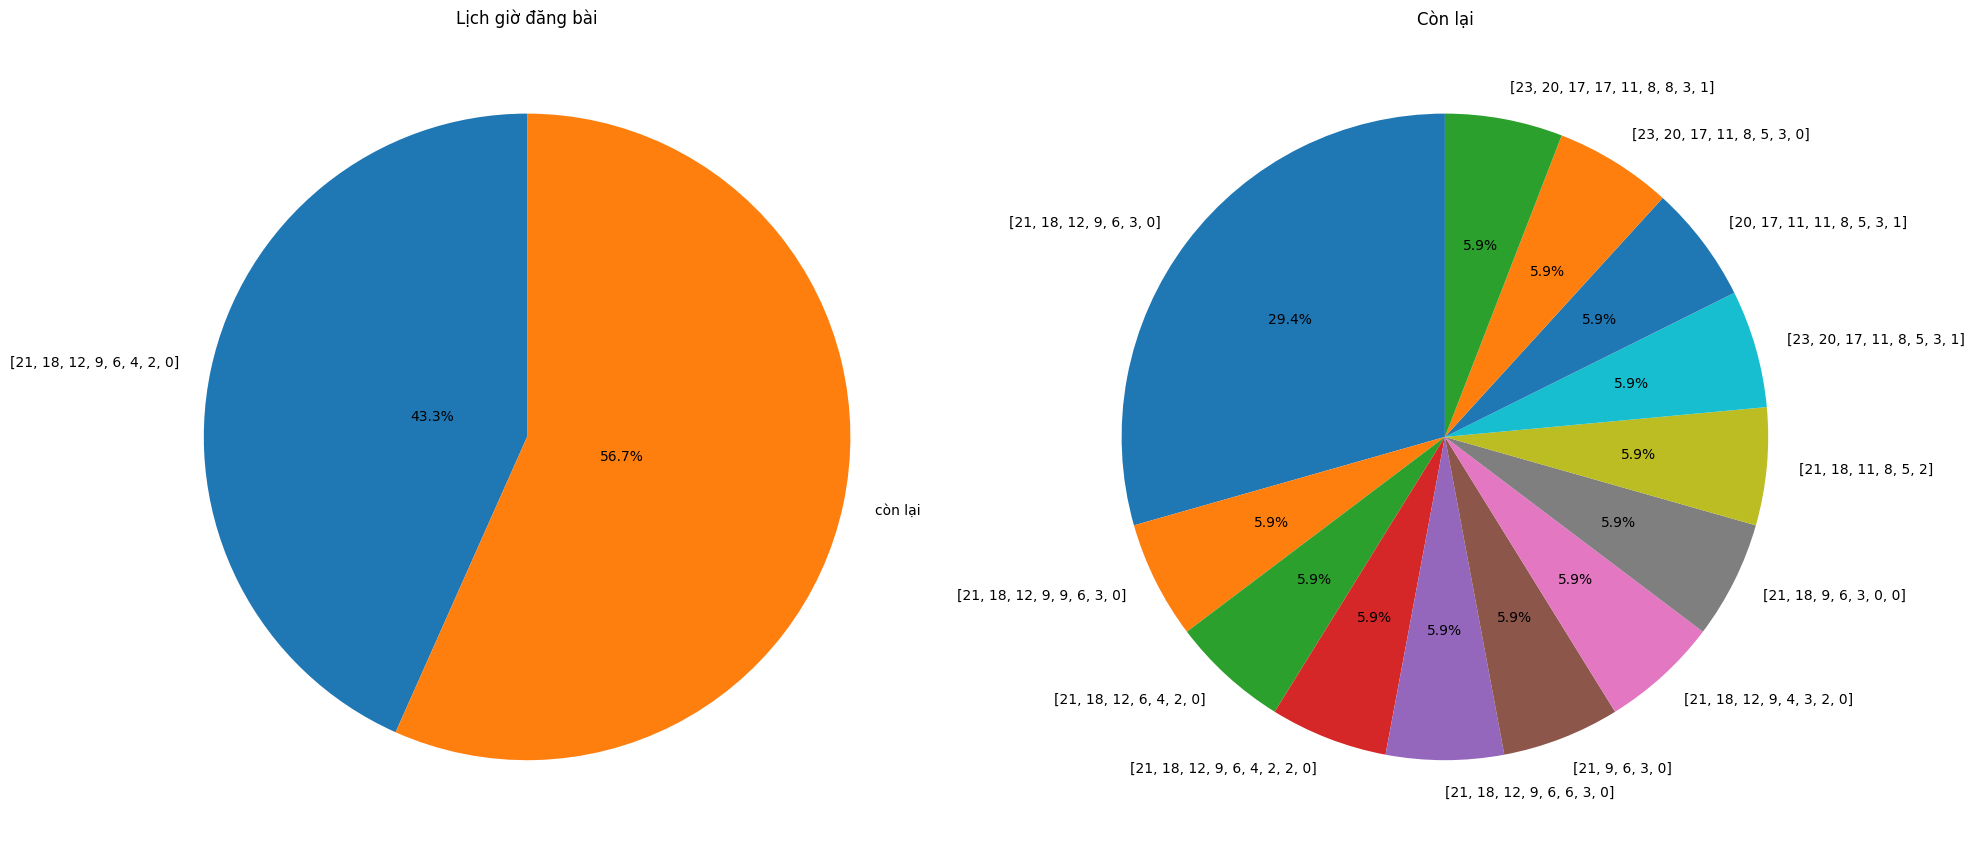

In [756]:
fig,axs = plt.subplots(1, 2, figsize=(20, 13))

axs[0].pie(value, labels=keys, autopct='%1.1f%%', startangle=90, pctdistance=.3, labeldistance=1.1)
axs[0].set_title('Lịch giờ đăng bài')

axs[1].pie(data.values(), labels=data.keys(), autopct='%1.1f%%', startangle=90)
axs[1].set_title('Còn lại')

plt.tight_layout()

plt.show()

In [764]:
new_data = {}
for key in data:
    if str(list(set(literal_eval(key)))[::-1] )+'*' in new_data:
        new_data[(str(list(set(literal_eval(key)))[::-1])+'*')] += data[key]
    else:
        new_data[(str(list(set(literal_eval(key)))[::-1])+"*")] = data[key]
    

In [765]:
new_data

{'[21, 18, 12, 9, 6, 3, 0]*': 7,
 '[21, 18, 12, 6, 4, 2, 0]*': 1,
 '[21, 18, 12, 9, 6, 4, 2, 0]*': 1,
 '[21, 9, 6, 3, 0]*': 1,
 '[21, 18, 12, 9, 4, 3, 2, 0]*': 1,
 '[21, 18, 9, 6, 3, 0]*': 1,
 '[21, 18, 11, 8, 5, 2]*': 1,
 '[23, 20, 17, 11, 8, 5, 3, 1]*': 1,
 '[20, 17, 11, 8, 5, 3, 1]*': 1,
 '[23, 20, 17, 11, 8, 5, 3, 0]*': 1,
 '[23, 20, 17, 11, 8, 3, 1]*': 1}

In [766]:
a = sum(new_data.values())
a

17

In [767]:
a = new_data.pop(str(list(set(literal_eval(max_key)))[::-1] )+'*')

In [761]:
a

1

In [768]:
inter = {max_key+" + *":max_value + a}
inter.update(new_data)
new_data=inter

In [769]:
a=[0.1]
for key in new_data:
    a.append(0)

In [770]:
a.pop()

0

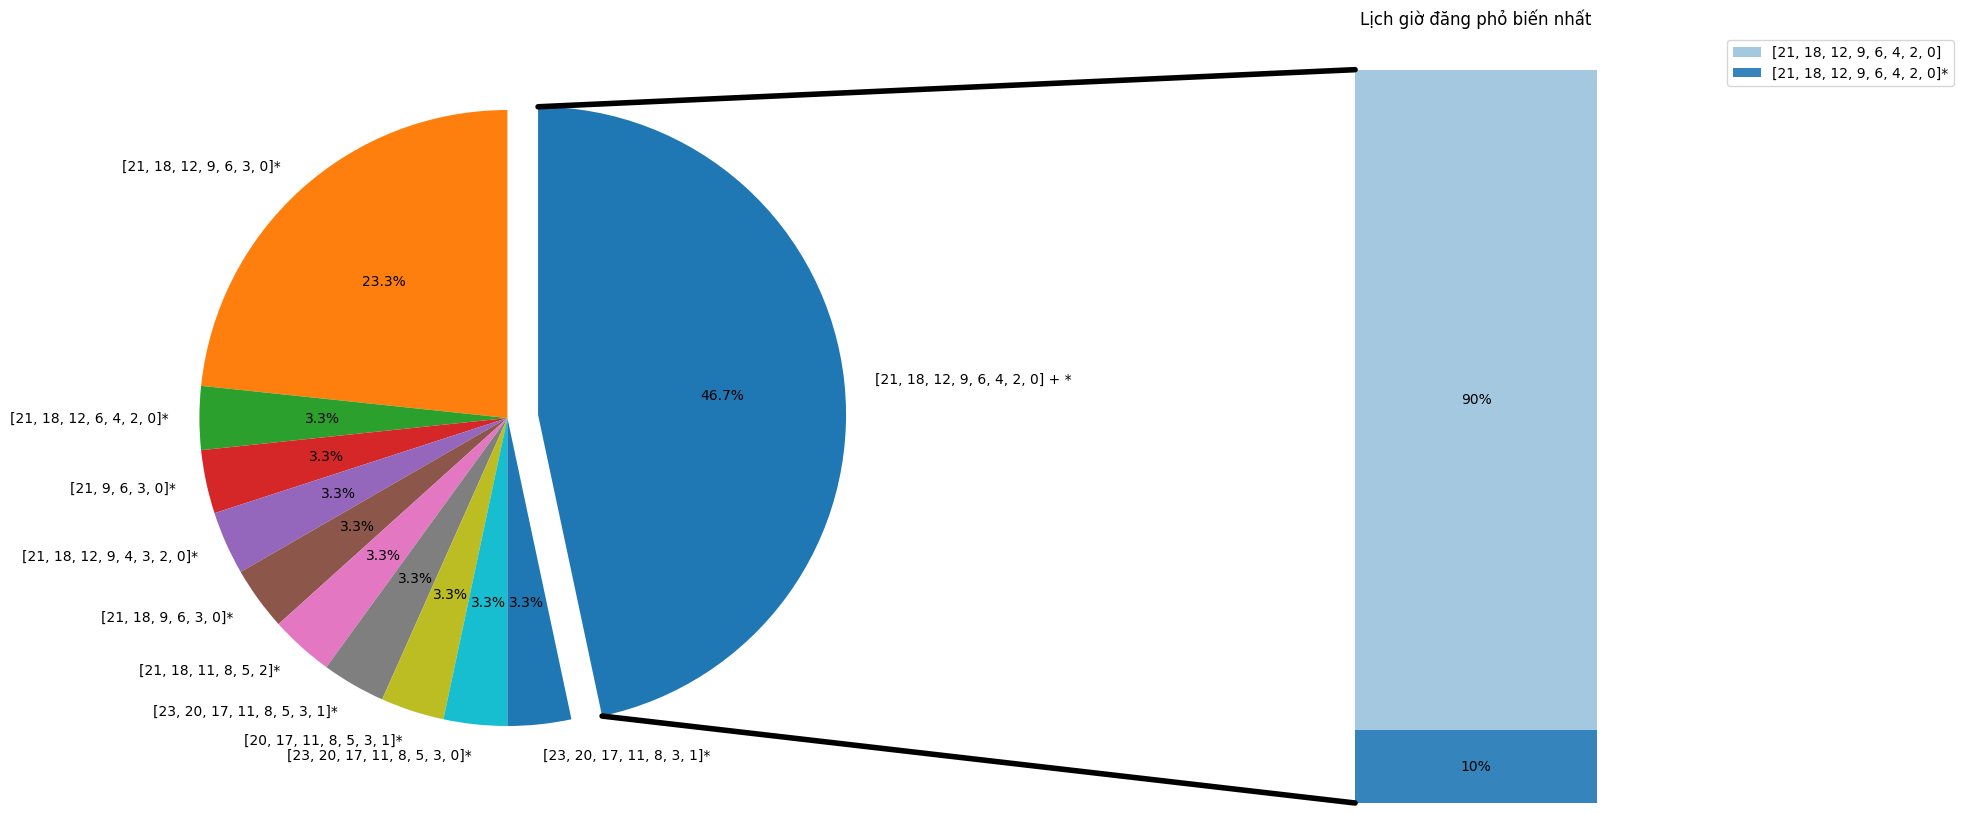

In [772]:
from matplotlib import gridspec
from matplotlib.patches import ConnectionPatch
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(25, 10))
fig.subplots_adjust(wspace=0)

wedges, *_=ax1.pie(new_data.values(),labels=new_data.keys(),autopct='%1.1f%%', startangle=-78,explode = a)
age_ratios = [.1, .9]
age_labels = [str(list(set(literal_eval(max_key)))[::-1] )+'*', max_key ]
bottom = 1
width = .1


for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = plt.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.4 + 0.5 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')
    ax2.set_title('Lịch giờ đăng phỏ biến nhất')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2 * width, 2 * width)


theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)


x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)


x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)


plt.show()

Analyzing engagement values

In [785]:
select['reactions'] = select['reactions'].apply(lambda x : dict(eval(x)))

In [786]:
a = select['reactions'].apply(pd.Series)

In [787]:
react = pd.concat([select, a], axis=1).drop('reactions', axis=1)
react[['text','like','love','haha','wow','sad','angry','care',
                                 'shares','comments','reaction_count']]


text    like    love   haha  \
0    How we've dealt with periods over millennia sa...   383.0    11.0    1.0   
1    What will it take the save the world's rivers?...   675.0    46.0    2.0   
2    North America is becoming a more popular winte...   710.0    41.0    2.0   
3    Experts have one key piece of advice for our a...   501.0    46.0    1.0   
4    A traffic cam along I-94 in Minnesota captured...  6800.0  2100.0  197.0   
..                                                 ...     ...     ...    ...   
225  The Swedish capital's character has been shape...  1000.0    67.0    0.0   
226  When certain vitamins, minerals, or phytonutri...   416.0    11.0    0.0   
227  When certain vitamins, minerals, or phytonutri...   416.0    11.0    0.0   
228  The backstory of jack-o'-lanterns, including h...   447.0     7.0    3.0   
229  Happy Halloween! A female black widow and her ...  1300.0   203.0    3.0   

       wow  sad  angry   care  shares  comments  reaction_count  
0      0.0  0.0    0.0    2.0      15         6             397  
1      3.0  0.0    0.0    4.0      35        20             730  
2      1.0  0.0    0.0    0.0      15        12             754  
3      1.0  0.0    0.0    5.0      68        22             554  
4    133.0  2.0    1.0  107.0    1000       357            9400  
..     ...  ...    ...    ...     ...       ...             ...  
225    2.0  0.0    0.0   10.0      29        14            1000  
226    1.0  0.0    0.0    1.0      34        13             429  
227    1.0  0.0    0.0    1.0      34        13             429  
228   46.0  2.0    3.0    5.0      61        44             513  
229  180.0  1.0    4.0   12.0     120        74            1700  

[230 rows x 11 columns]

In [788]:
for i in range(0, len(react['like'].values), 1):
    if pd.isna(react['like'].values[i]):
        react['like'].values[i] = 0

    if pd.isna(react['love'].values[i]):
        react['love'].values[i] = 0

    if pd.isna(react['haha'].values[i]):
        react['haha'].values[i] = 0

    if pd.isna(react['wow'].values[i]):
        react['wow'].values[i] = 0

    if pd.isna(react['sad'].values[i]):
        react['sad'].values[i] = 0

    if pd.isna(react['angry'].values[i]):
        react['angry'].values[i] = 0

    if pd.isna(react['care'].values[i]):
        react['care'].values[i] = 0

    if pd.isna(react['shares'].values[i]):
        react['shares'].values[i] = 0
    
    if pd.isna(react['comments'].values[i]):
        react['comments'].values[i] = 0

react[['text','like','love','haha','wow','sad','angry','care',
                                 'shares','comments','reaction_count']]

text    like    love   haha  \
0    How we've dealt with periods over millennia sa...   383.0    11.0    1.0   
1    What will it take the save the world's rivers?...   675.0    46.0    2.0   
2    North America is becoming a more popular winte...   710.0    41.0    2.0   
3    Experts have one key piece of advice for our a...   501.0    46.0    1.0   
4    A traffic cam along I-94 in Minnesota captured...  6800.0  2100.0  197.0   
..                                                 ...     ...     ...    ...   
225  The Swedish capital's character has been shape...  1000.0    67.0    0.0   
226  When certain vitamins, minerals, or phytonutri...   416.0    11.0    0.0   
227  When certain vitamins, minerals, or phytonutri...   416.0    11.0    0.0   
228  The backstory of jack-o'-lanterns, including h...   447.0     7.0    3.0   
229  Happy Halloween! A female black widow and her ...  1300.0   203.0    3.0   

       wow  sad  angry   care  shares  comments  reaction_count  
0      0.0  0.0    0.0    2.0      15         6             397  
1      3.0  0.0    0.0    4.0      35        20             730  
2      1.0  0.0    0.0    0.0      15        12             754  
3      1.0  0.0    0.0    5.0      68        22             554  
4    133.0  2.0    1.0  107.0    1000       357            9400  
..     ...  ...    ...    ...     ...       ...             ...  
225    2.0  0.0    0.0   10.0      29        14            1000  
226    1.0  0.0    0.0    1.0      34        13             429  
227    1.0  0.0    0.0    1.0      34        13             429  
228   46.0  2.0    3.0    5.0      61        44             513  
229  180.0  1.0    4.0   12.0     120        74            1700  

[230 rows x 11 columns]

In [789]:
select['like'] = react['like']
select['love'] = react['love']
select['haha'] = react['haha']
select['wow'] = react['wow']
select['sad'] = react['sad']
select['angry'] = react['angry']
select['care'] = react['care']

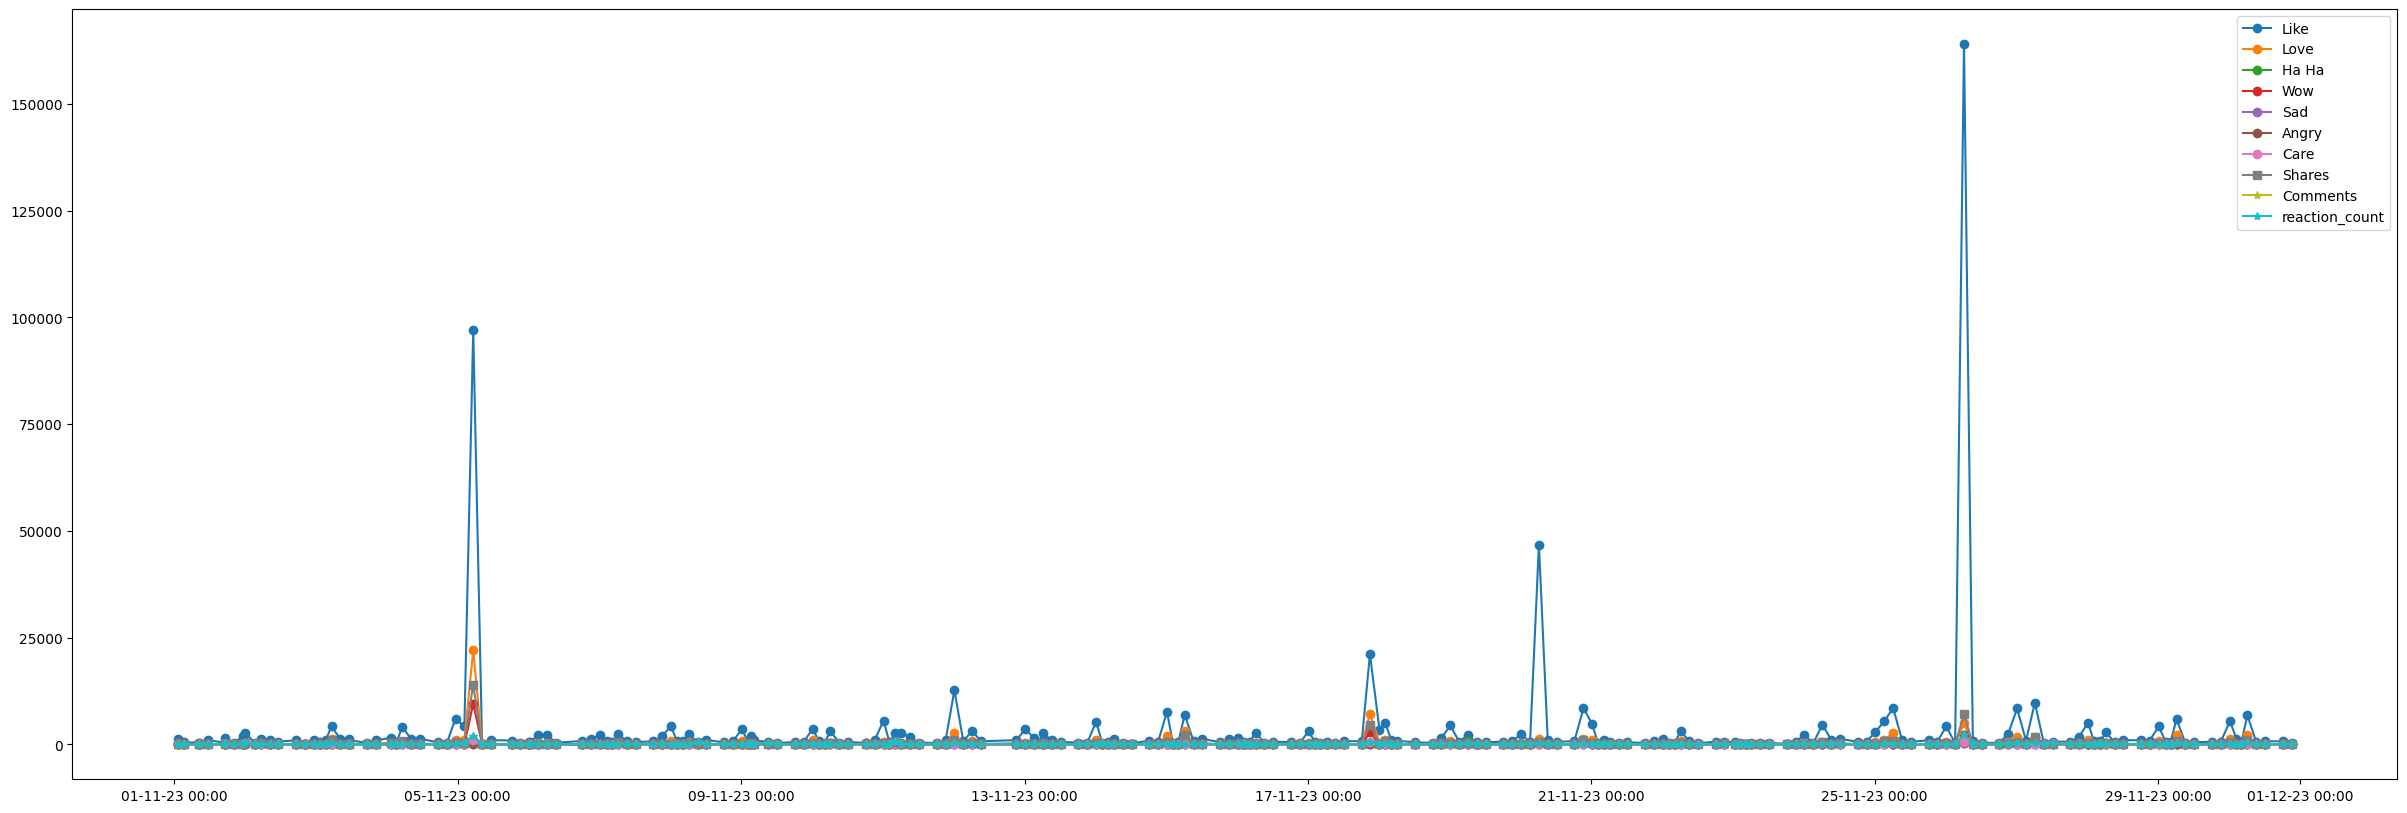

In [723]:
fig, ax = plt.subplots(figsize=(30, 10))
ax.plot(react['time'], react['like'], label = "Like", marker="o")
ax.plot(react['time'], react['love'], label = "Love", marker="o")
ax.plot(react['time'], react['haha'], label = "Ha Ha", marker="o")
ax.plot(react['time'], react['wow'], label = "Wow", marker="o")
ax.plot(react['time'], react['sad'], label = "Sad", marker="o")
ax.plot(react['time'], react['angry'], label = "Angry", marker="o")
ax.plot(react['time'], react['care'], label = "Care", marker="o")
ax.plot(react['time'], react['shares'], label = "Shares", marker="s")
ax.plot(react['time'], react['comments'], label = "Comments", marker="*")
ax.plot(react['time'], react['comments'], label = "reaction_count", marker="*")

plt.legend()
from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))

Ta thấy có 5 bài đăng có sô reactions cao hơn hẳn các bài khác, ta sẽ lấy các bài viral này ra và phân tích chúng


In [790]:
top_5_rows = react.nlargest(5, 'like')
top_5_rows

time   likes  comments  reaction_count  \
35  2023-11-26 06:15:00  164000      2300          192000   
195 2023-11-05 05:15:00   97000      2000          130000   
80  2023-11-20 06:15:12   46750       273           48485   
98  2023-11-17 21:00:35   21125       499           31720   
143 2023-11-12 00:15:01   12661       287           15681   

                                                 image  \
35                                                 NaN   
195                                                NaN   
80                                                 NaN   
98                                                 NaN   
143  https://m.facebook.com/photo/view_full_size/?f...   

                                                 video  \
35   https://scontent.fhan14-2.fna.fbcdn.net/v/t42....   
195  https://scontent.fhan14-2.fna.fbcdn.net/v/t42....   
80   https://scontent.fhan14-2.fna.fbcdn.net/v/t42....   
98   https://scontent.fhan14-2.fna.fbcdn.net/v/t42....   
143                                                NaN   

                                                  link  \
35                                                 NaN   
195                                                NaN   
80                                                 NaN   
98   https://on.natgeo.com/49Gn6DJ?fbclid=IwAR18_tf...   
143                                                NaN   

                                                  text  shares  \
35   Known as the heaviest snake in the world, the ...    7000   
195  Watch-and listen to-two satisfying minutes of ...   14000   
80   This Egyptian goose will do whatever it takes ...     542   
98   Crews captured an incredibly rare scene—the bi...    4600   
143  Brown bears wait for sockeye salmon to jump at...    1000   

                                              post_url    topic  \
35   https://facebook.com/natgeo/posts/897234058440692  Animals   
195  https://facebook.com/natgeo/posts/897234058440692  Animals   
80   https://facebook.com/natgeo/posts/894308612066570  Animals   
98   https://facebook.com/natgeo/posts/894113135419451  Animals   
143  https://facebook.com/natgeo/posts/890974719066626  Animals   

                                        processed_text  engagement      like  \
35   known heaviest snake world green anaconda weig...      201300  164000.0   
195  listen satisfi minut fox prowl yellowston nati...      146000   97000.0   
80             egyptian goos whatev take protect chick       49300   46750.0   
98   crew captur incred rare birth humpback film in...       36819   21125.0   
143  brown bear wait sockey salmon jump brook fall ...       16968   12661.0   

        love   care   haha     wow    sad  angry  
35    4900.0  593.0  568.0  2100.0  356.0  197.0  
195  22000.0  985.0  359.0  9500.0   40.0   10.0  
80    1138.0  181.0  126.0   188.0   78.0   24.0  
98    7166.0  646.0   16.0  2761.0    6.0    0.0  
143   2628.0  120.0   17.0   251.0    3.0    1.0

In [403]:
for index, row in top_5_rows.iterrows():
    print(row['post_url'])


https://www.facebook.com/natgeo/posts/89420962207646967
https://www.facebook.com/natgeo/posts/89420962207646934
https://www.facebook.com/natgeo/posts/89420962207646999
https://www.facebook.com/natgeo/posts/89420962207646956
https://www.facebook.com/natgeo/posts/89420962207646915


https://www.facebook.com/natgeo/posts/89420962207646902
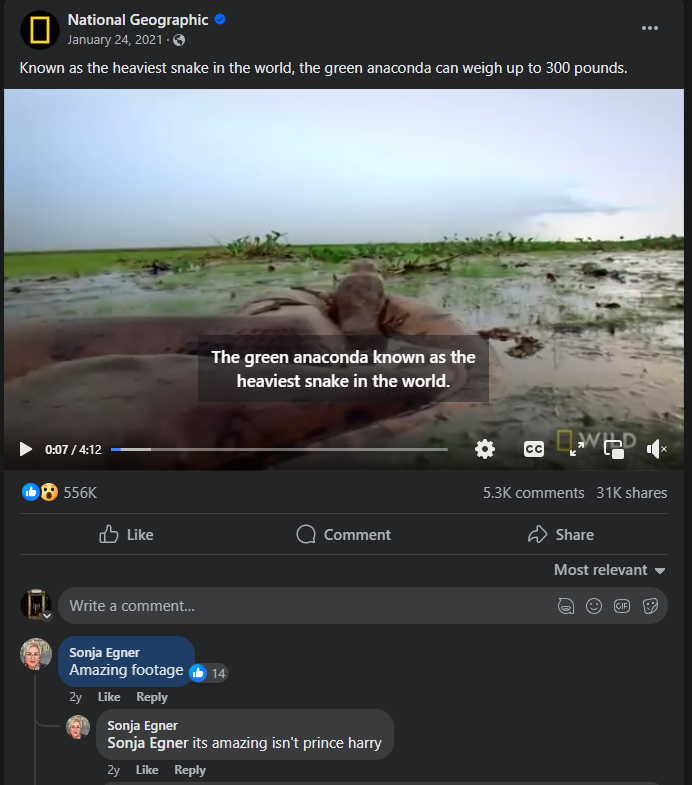
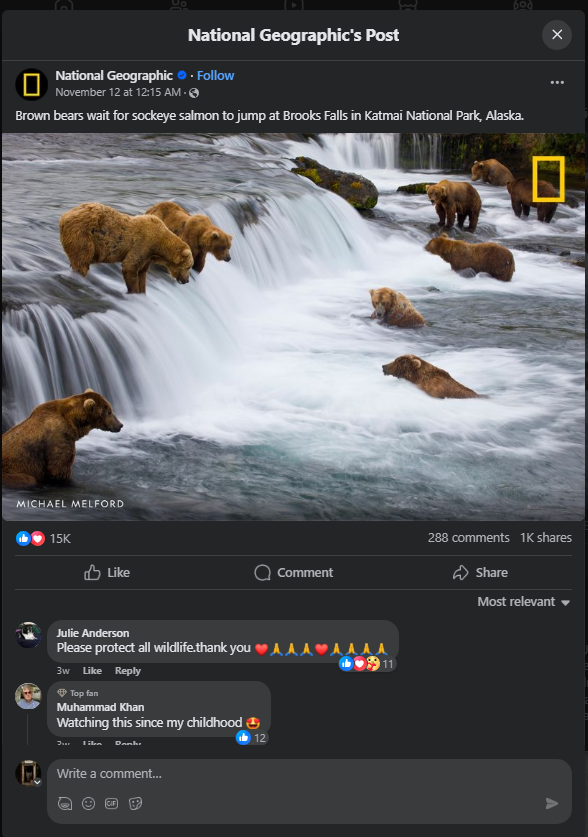

https://www.facebook.com/natgeo/posts/89420962207646915
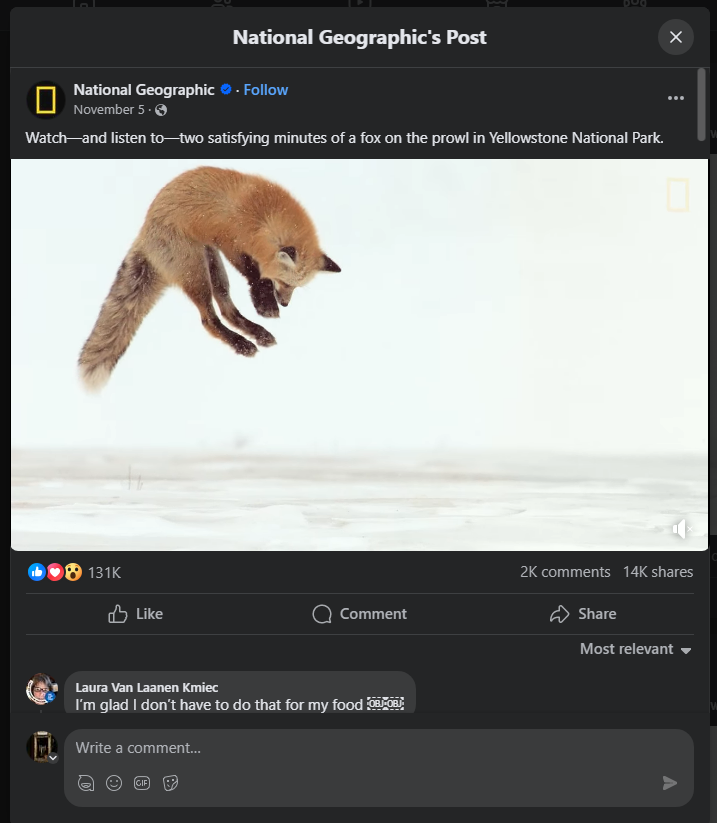

https://www.facebook.com/natgeo/posts/89420962207646925
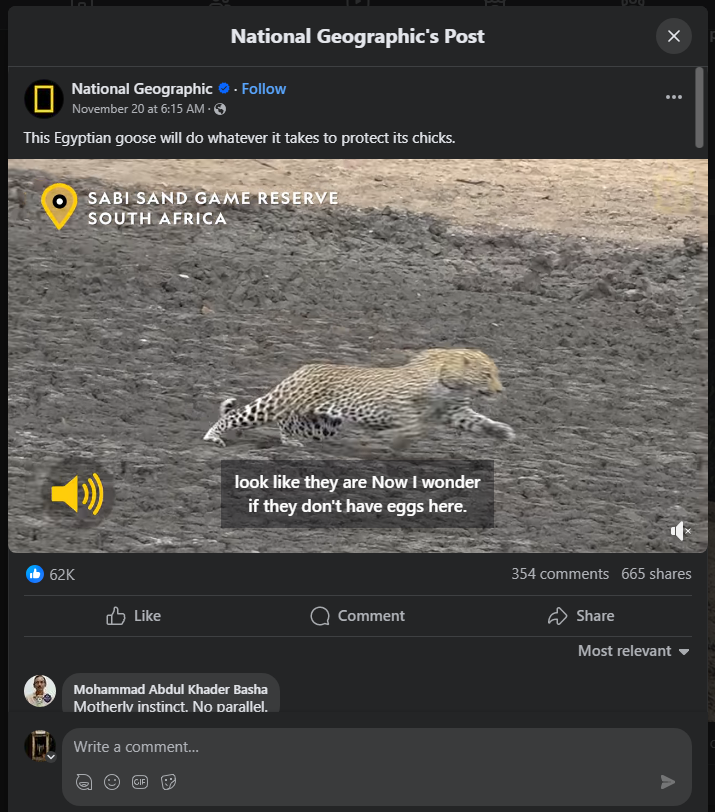


https://www.facebook.com/natgeo/posts/89420962207646930
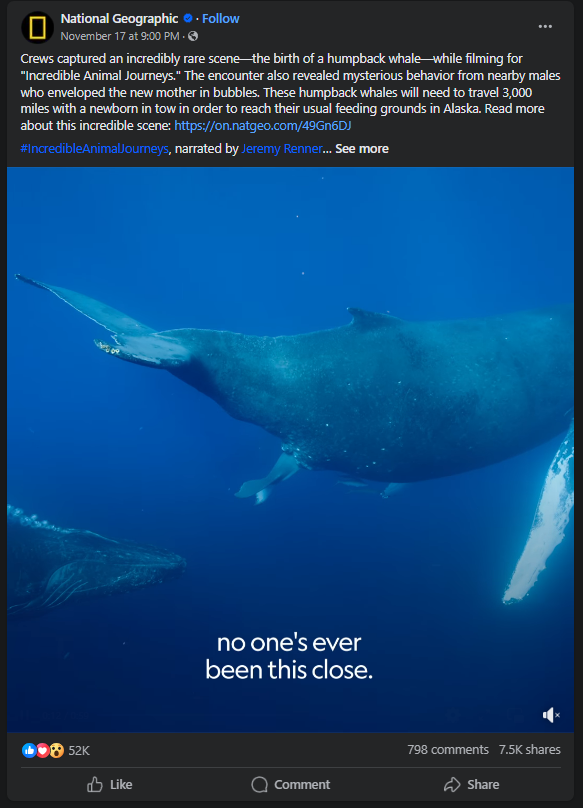

https://www.facebook.com/natgeo/posts/89420962207646940
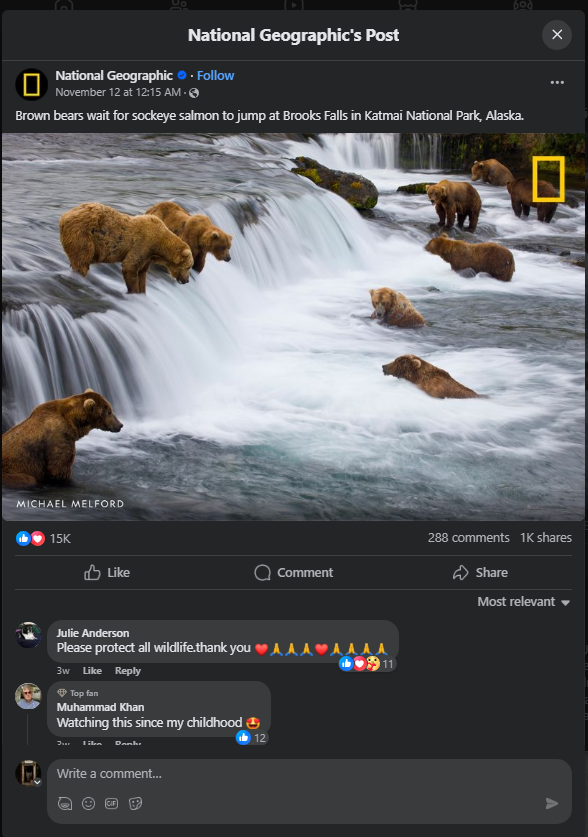

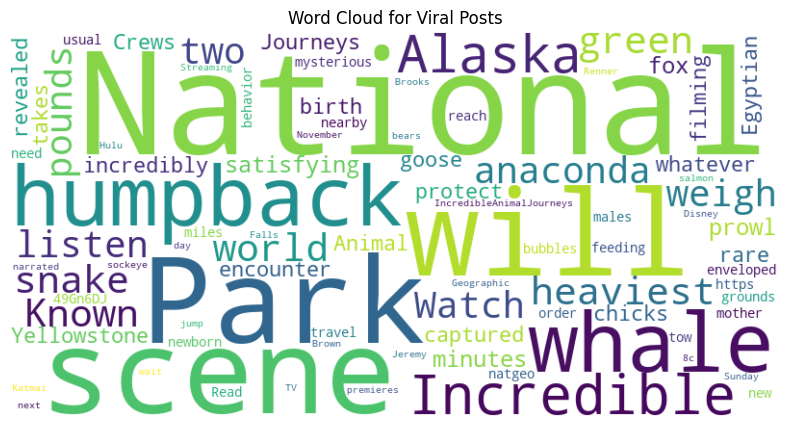

In [441]:
combined_text = ' '.join(top_5_rows['text'])
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)
# Plot the word cloud using Seaborn
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Word Cloud for Viral Posts')
plt.axis('off')
plt.show()

In [442]:
react_after = react.drop(top_5_rows.index)

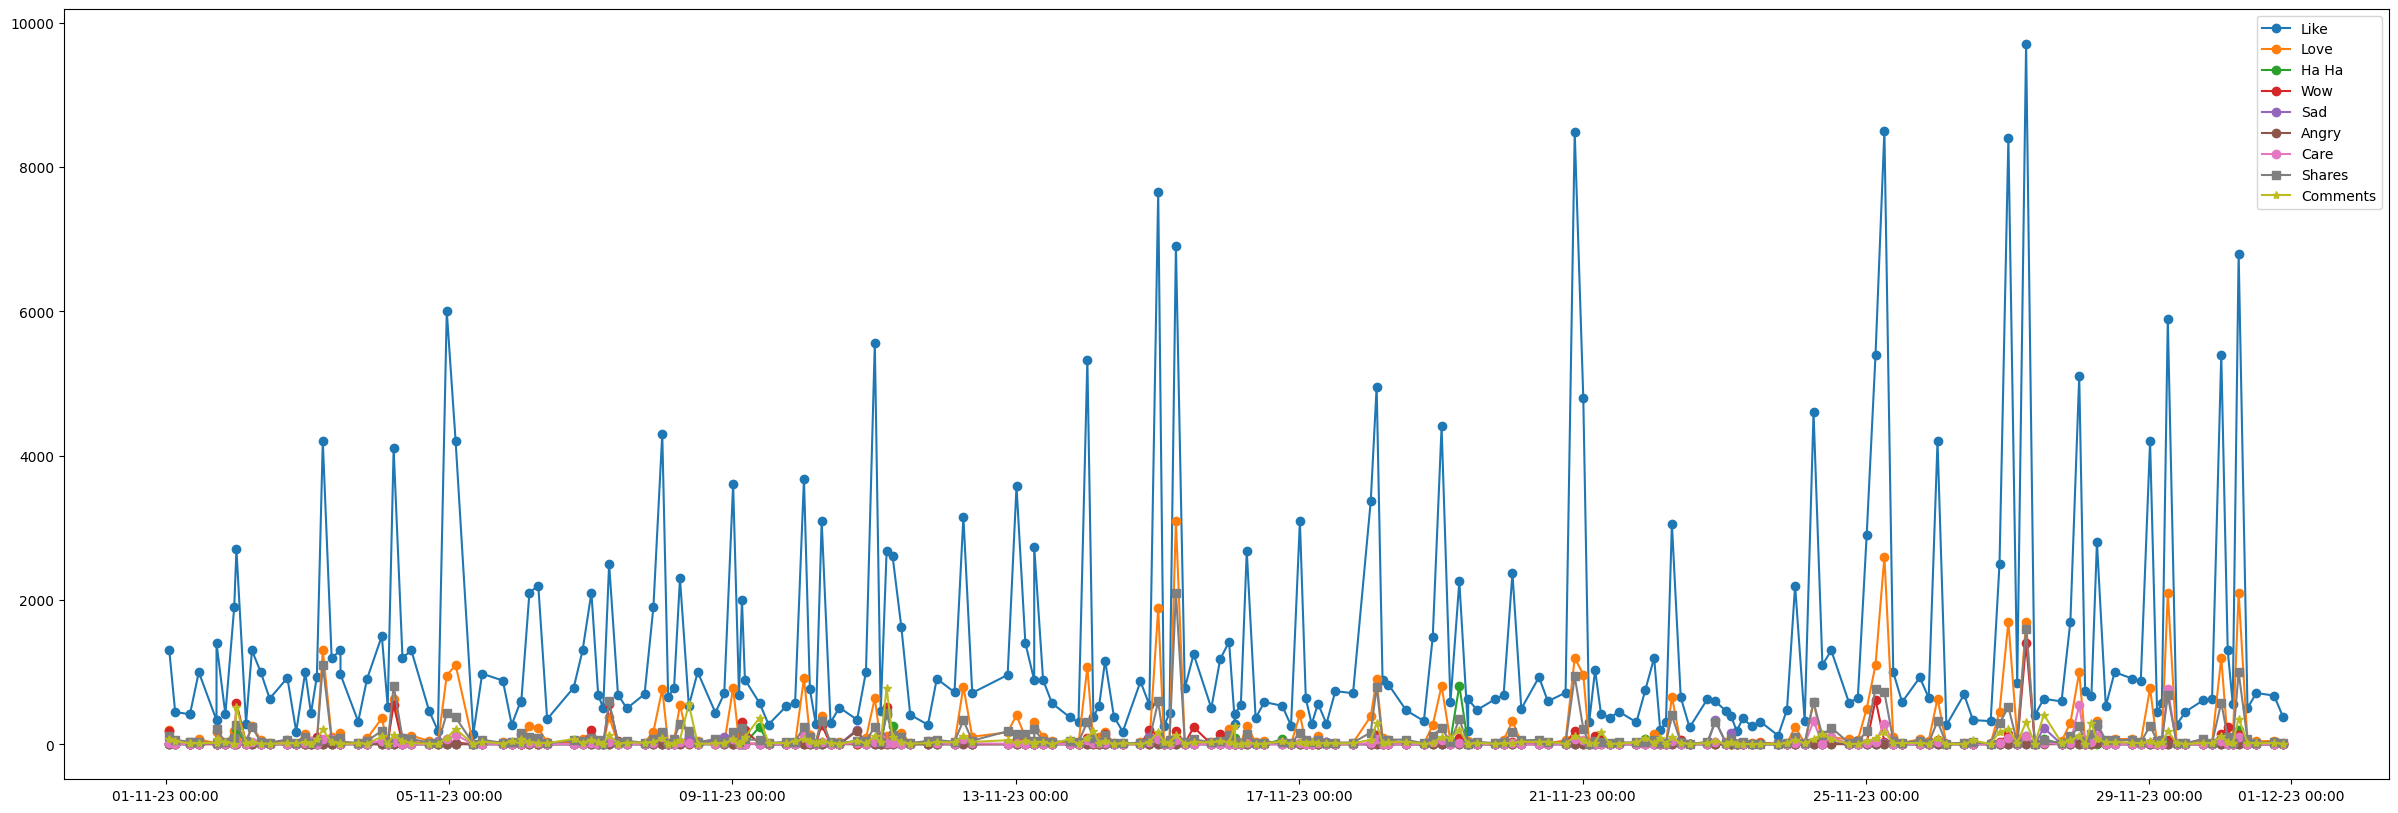

In [443]:
fig, ax = plt.subplots(figsize=(30, 10))
ax.plot(react_after['time'], react_after['like'], label = "Like", marker="o")
ax.plot(react_after['time'], react_after['love'], label = "Love", marker="o")
ax.plot(react_after['time'], react_after['haha'], label = "Ha Ha", marker="o")
ax.plot(react_after['time'], react_after['wow'], label = "Wow", marker="o")
ax.plot(react_after['time'], react_after['sad'], label = "Sad", marker="o")
ax.plot(react_after['time'], react_after['angry'], label = "Angry", marker="o")
ax.plot(react_after['time'], react_after['care'], label = "Care", marker="o")
ax.plot(react_after['time'], react_after['shares'], label = "Shares", marker="s")
ax.plot(react_after['time'], react_after['comments'], label = "Comments", marker="*")

plt.legend()
from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))

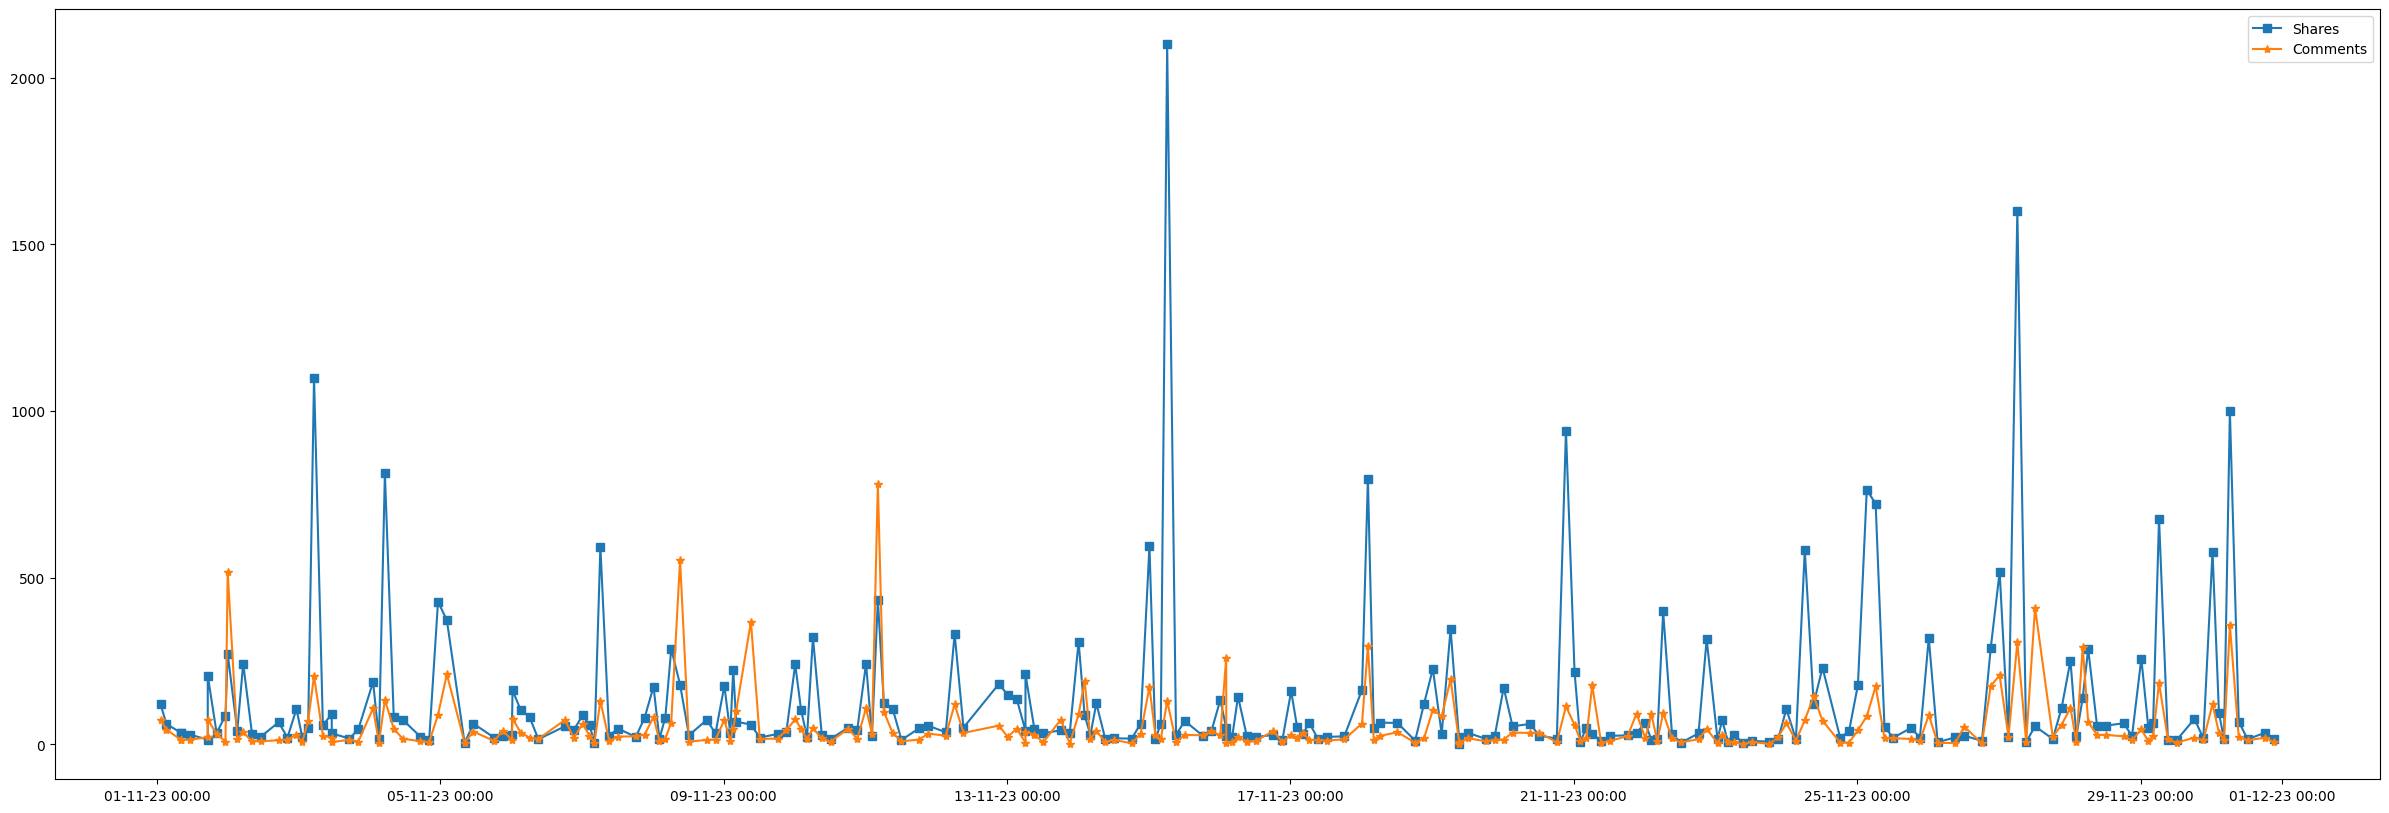

In [444]:
fig, ax = plt.subplots(figsize=(30, 10))
ax.plot(react_after['time'], react_after['shares'], label = "Shares", marker="s")
ax.plot(react_after['time'], react_after['comments'], label = "Comments", marker="*")

plt.legend()
from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))

phân tích các bài đăng có link,video hoặc ảnh

In [796]:
column =['link','image','video','time','engagement']
a = select[column]
a

link  \
0    https://www.nationalgeographic.com/history/art...   
1    https://www.nationalgeographic.com/environment...   
2    https://www.nationalgeographic.com/travel/arti...   
3    https://www.nationalgeographic.com/premium/art...   
4                                                  NaN   
..                                                 ...   
225  https://www.nationalgeographic.com/travel/arti...   
226  https://www.nationalgeographic.com/premium/art...   
227  https://www.nationalgeographic.com/premium/art...   
228  https://www.nationalgeographic.com/history/art...   
229                                                NaN   

                                                 image  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
225                                                NaN   
226                                                NaN   
227                                                NaN   
228                                                NaN   
229  https://scontent.fhan14-4.fna.fbcdn.net/v/t39....   

                                                 video                time  \
0                                                  NaN 2023-11-30 21:15:00   
1                                                  NaN 2023-11-30 18:15:00   
2                                                  NaN 2023-11-30 12:15:00   
3                                                  NaN 2023-11-30 09:15:00   
4    https://scontent.fhan14-2.fna.fbcdn.net/v/t42.... 2023-11-30 06:15:00   
..                                                 ...                 ...   
225                                                NaN 2023-11-01 11:15:00   
226                                                NaN 2023-11-01 08:15:00   
227                                                NaN 2023-11-01 08:15:00   
228                                                NaN 2023-11-01 03:15:00   
229                                                NaN 2023-11-01 01:15:00   

     engagement  
0           418  
1           785  
2           781  
3           644  
4         10757  
..          ...  
225        1043  
226         476  
227         476  
228         618  
229        1894  

[230 rows x 5 columns]

In [799]:
b = a[(a['link'].notna())&(a['video'].notna())&(a['image'].isna())]# link and video
b.shape[0] 


4

In [800]:
c = a[(a['link'].notna())&(a['image'].notna())&(a['video'].isna())]#link and image
c.shape[0]


15

In [801]:
d = a[(a['video'].notna())&(a['image'].notna())&(a['link'].isna())]#image and video
d.shape[0]


0

In [802]:
e = a[(a['video'].isna())&(a['image'].isna())&(a['link'].notna())]#link
e.shape[0]


152

In [803]:
f = a[(a['link'].isna())&(a['video'].isna())&(a['image'].notna())]#image
f.shape[0]


32

In [804]:
g = a[(a['link'].isna())&(a['image'].isna())&(a['video'].notna())]
g.shape[0]video
#

25

In [805]:
h = a[(a['link'].isna())&(a['image'].isna())&(a['video'].isna())]#no link, video and image
h.shape[0]


2

In [806]:
i = a[(a['link'].notna())&(a['image'].notna())&(a['video'].notna())]#link, video and image
i.shape[0]


0

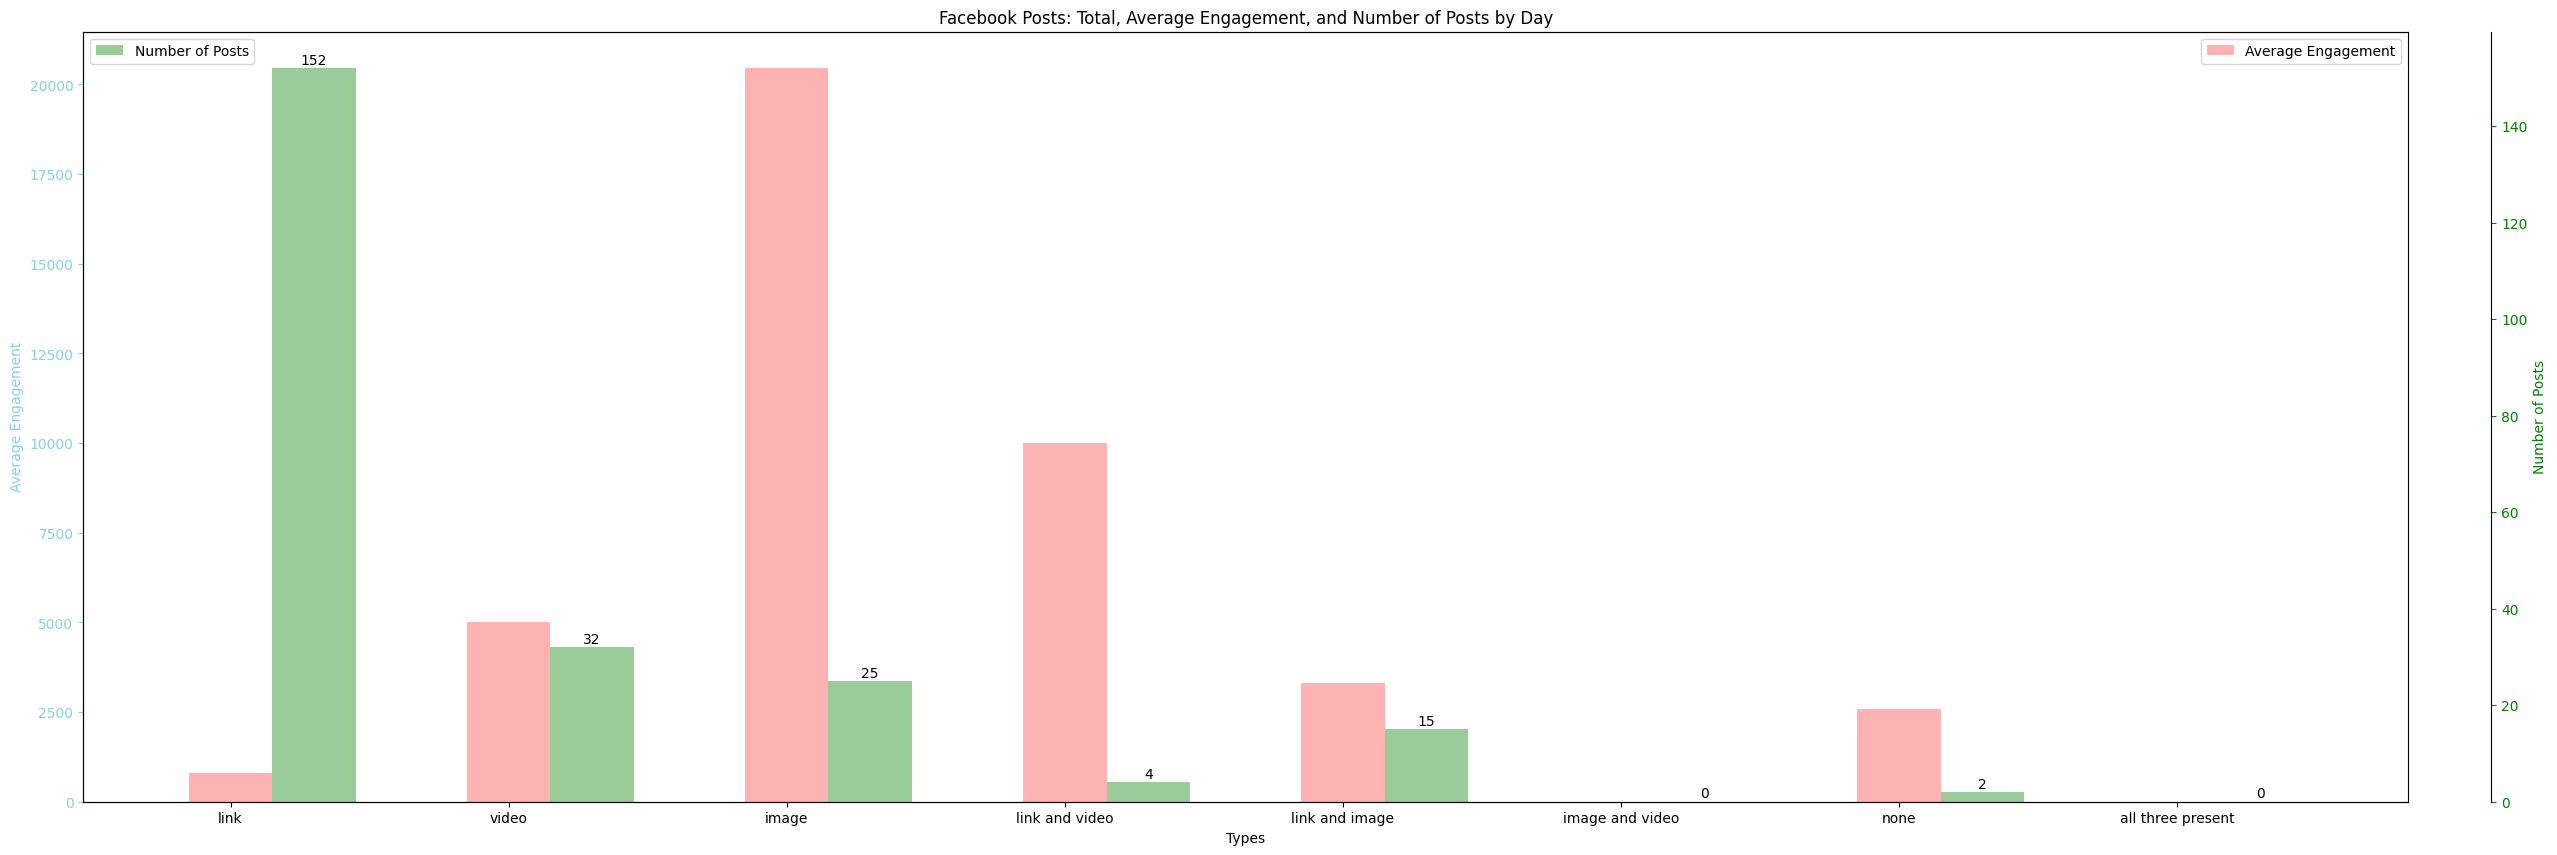

In [811]:
df_names = ['link', 'video', 'image', 'link and video', 'link and image','image and video','none','all three present']
a1 = e['engagement'].mean()
b1=f['engagement'].mean()
c1=g['engagement'].mean()
d1=b['engagement'].mean()
e1=c['engagement'].mean()
f1=d['engagement'].mean()
g1=h['engagement'].mean()
h1=i['engagement'].mean()
avg_engagement = [a1,b1,c1,d1,e1,f1,g1,h1]
num_posts = [len(e), len(f), len(g), len(b), len(c),len(d),len(h),len(i)]

fig, ax1 = plt.subplots(figsize=(30, 10))


bar_width = 0.3  
ax1.bar(df_names, avg_engagement, width=bar_width, label='Average Engagement', alpha=0.3, color='red')
ax1.set_xlabel('Types')
ax1.set_ylabel('Average Engagement', color='skyblue')
ax1.tick_params('y', colors='skyblue')
plt.legend(loc='upper right')



ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  
bar3 = ax3.bar(np.arange(len(df_names)) + bar_width, num_posts, width=bar_width, label='Number of Posts', alpha=0.4, color='green')
ax3.set_ylabel('Number of Posts', color='green')
ax3.tick_params('y', colors='green')


for bar, count in zip(bar3, num_posts):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width() / 2, height + 0.2, f'{count}', ha='center', va='bottom', color='black')


plt.legend(loc='upper left', bbox_to_anchor=(0.2,1))
plt.title('Facebook Posts: Total, Average Engagement, and Number of Posts by Day')
plt.legend(loc='upper left')
plt.show()

Analyzing time with engagement

In [812]:
select['day'] = select['time'].dt.day

In [647]:
select['day']

0      30
1      30
2      30
3      30
4      30
       ..
225     1
226     1
227     1
228     1
229     1
Name: day, Length: 230, dtype: int32

In [648]:
grouped_data = select.groupby('day').agg(total_engagement=('engagement', 'sum'),
                                     post_count=('engagement', 'size')).reset_index()

grouped_data['average_engagement'] = grouped_data['total_engagement'] / grouped_data['post_count']

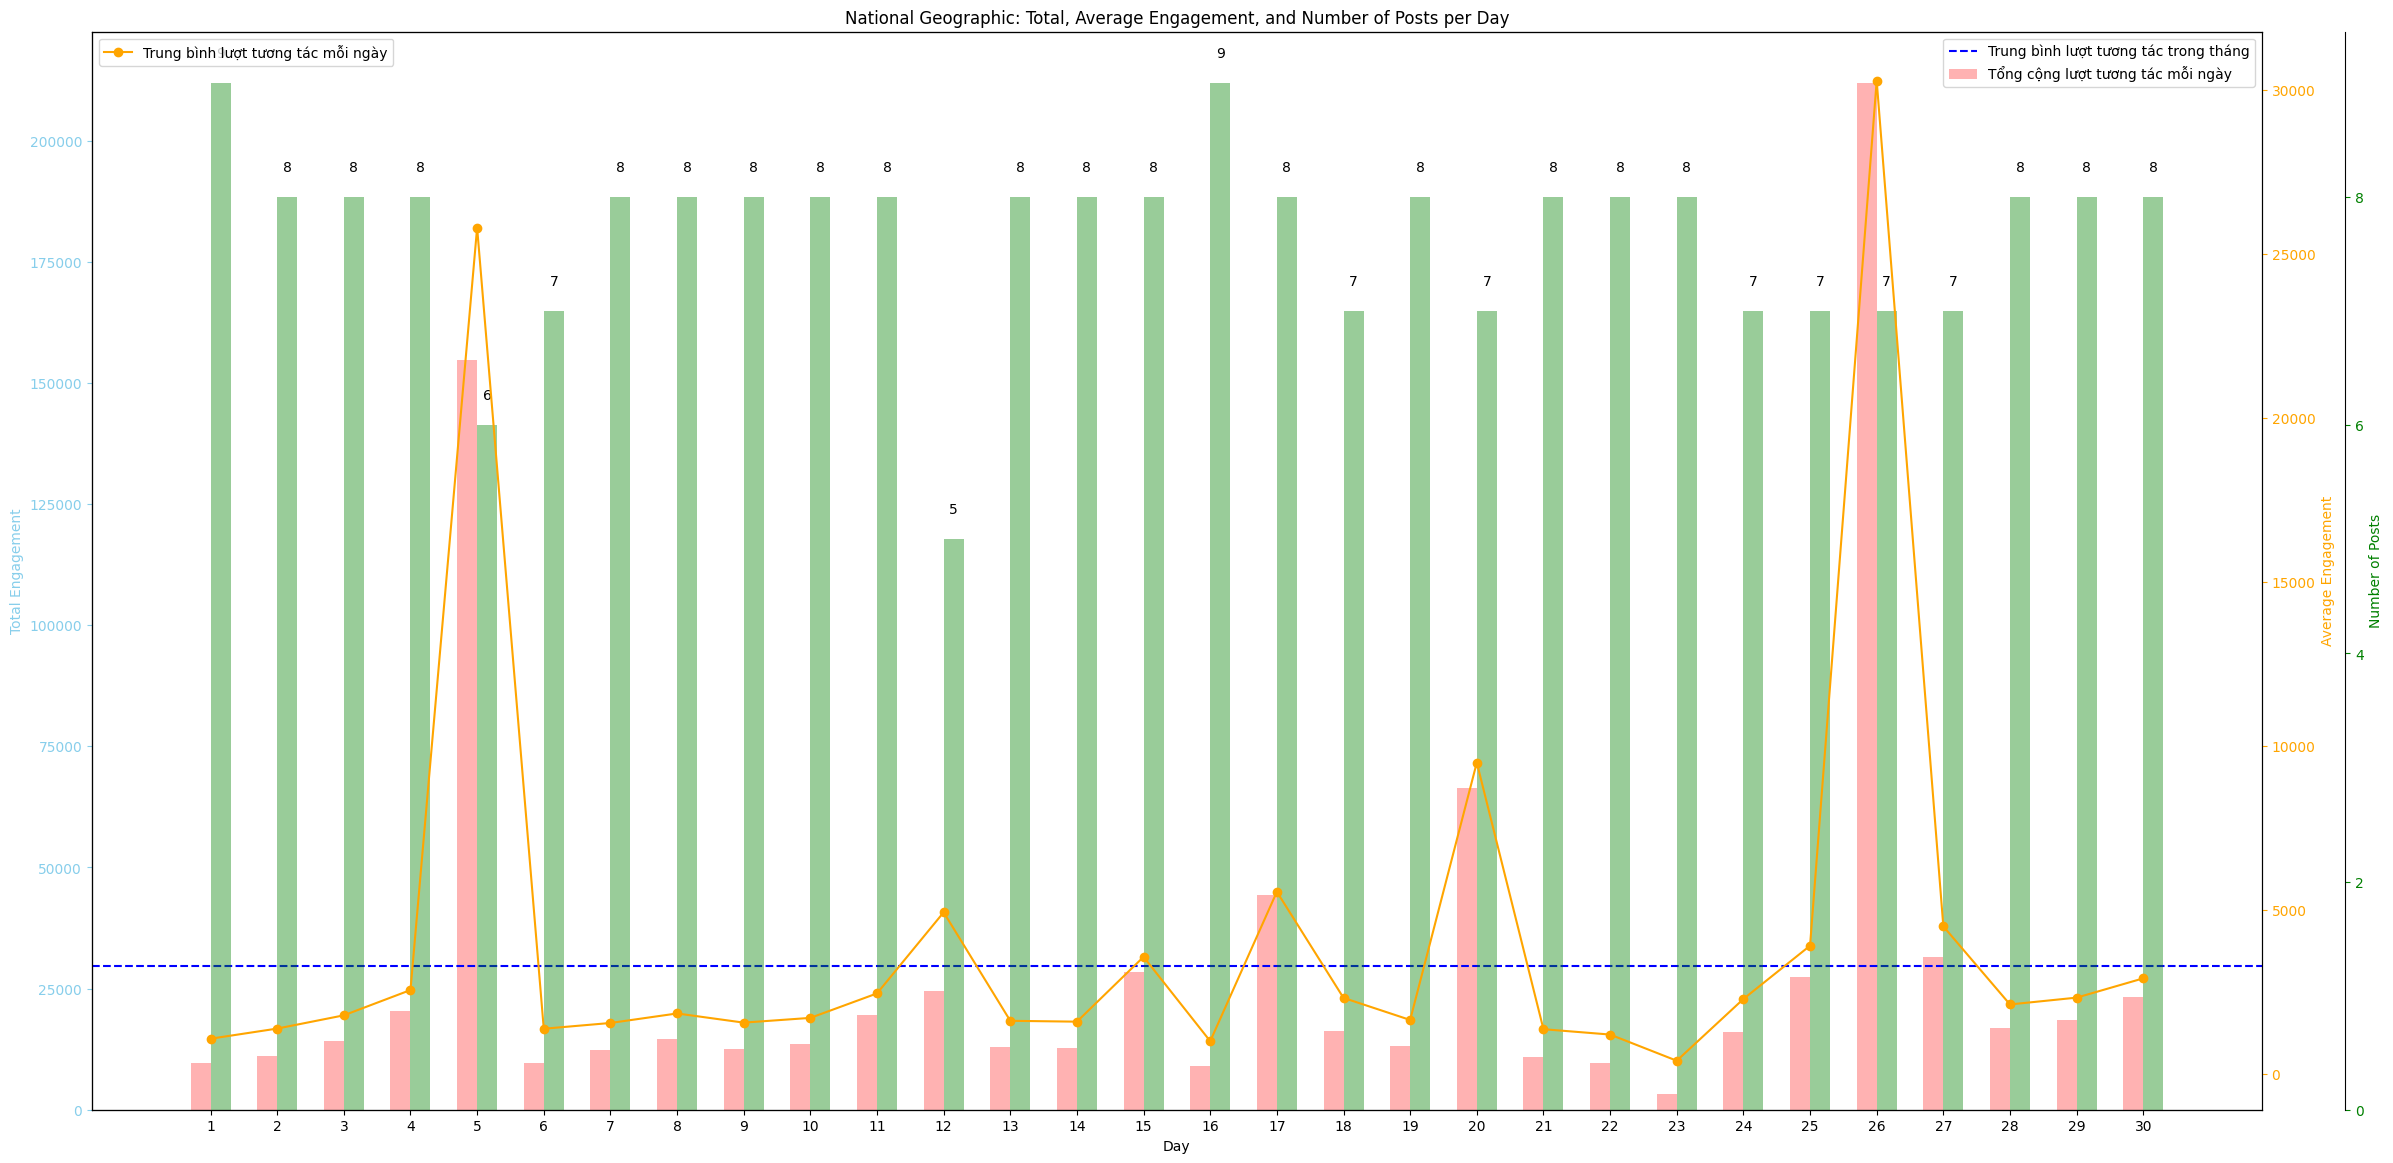

In [818]:

overall_average_total_engagement = grouped_data['total_engagement'].mean()
overall_average_average_engagement = grouped_data['average_engagement'].mean()

fig, ax1 = plt.subplots(figsize=(28, 14))

bar_width = 0.3  
ax1.bar(np.arange(len(grouped_data['day'])) - bar_width / 2, grouped_data['total_engagement'], width=bar_width, label='Tổng cộng lượt tương tác mỗi ngày', alpha=0.3, color='red')
ax1.axhline(y=overall_average_total_engagement, color='blue', linestyle='--', label='Trung bình lượt tương tác trong tháng')

ax1.set_xlabel('Day')
ax1.set_ylabel('Total Engagement', color='skyblue')
ax1.tick_params('y', colors='skyblue')
plt.legend(loc='upper right')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
bar3 = ax3.bar(np.arange(len(grouped_data['day'])) + bar_width / 2, grouped_data['post_count'], width=bar_width, label='Số bài đăng', alpha=0.4, color='green')
ax3.set_ylabel('Number of Posts', color='green')
ax3.tick_params('y', colors='green')

for bar, count in zip(bar3, grouped_data['post_count']):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width() / 2, height + 0.2, f'{count}', ha='center', va='bottom', color='black')

ax2 = ax1.twinx()

ax2.plot(np.arange(len(grouped_data['day'])), grouped_data['average_engagement'], label='Trung bình lượt tương tác mỗi ngày', marker='o', color='orange')

ax2.set_ylabel('Average Engagement', color='orange')
ax2.tick_params('y', colors='orange')

plt.legend(loc='upper left', bbox_to_anchor=(0.2, 1))
plt.title('National Geographic: Total, Average Engagement, and Number of Posts per Day')
plt.xticks(np.arange(len(grouped_data['day'])), grouped_data['day'])  # Set the x-axis ticks
plt.legend(loc='upper left')
plt.show()

In [650]:
select['hours'] = pd.to_datetime(select['time'])
select['hours'] = select['time'].dt.hour

In [651]:
for index,row in select.iterrows():
    print(row['hours'])

21
18
12
9
6
4
2
0
21
18
12
9
6
4
2
0
21
18
12
9
6
4
2
0
21
18
12
9
6
3
0
21
18
12
9
6
3
0
21
18
12
9
6
3
0
21
18
12
9
6
3
0
21
18
12
9
6
4
2
0
21
18
12
9
6
4
2
0
21
18
12
9
6
4
2
0
21
18
12
9
6
3
0
21
18
12
9
9
6
3
0
21
18
12
6
4
2
0
21
18
12
9
6
4
2
0
21
18
12
9
6
4
2
2
0
21
18
12
9
6
4
2
0
21
18
12
9
6
4
2
0
21
18
12
9
6
6
3
0
21
9
6
3
0
21
18
12
9
6
4
2
0
21
18
12
9
6
4
2
0
21
18
12
9
4
3
2
0
21
18
12
9
6
4
2
0
21
18
12
9
6
4
2
0
21
18
9
6
3
0
0
21
18
11
8
5
2
23
20
17
11
8
5
3
1
20
17
11
11
8
5
3
1
23
20
17
11
8
5
3
0
23
20
17
17
11
8
8
3
1


In [652]:
my_dict=[]


In [653]:
hourly_average_engagement = select.groupby(select['hours'])['engagement'].mean()

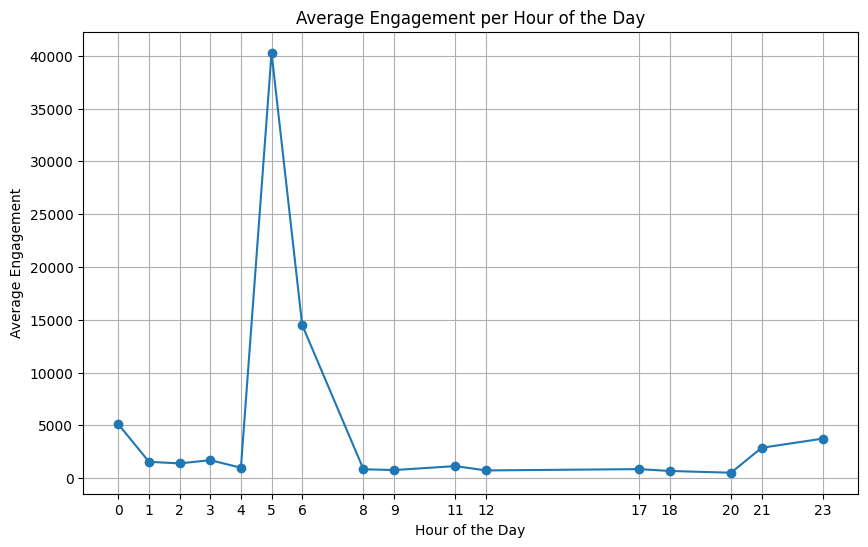

In [654]:

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(hourly_average_engagement.index, hourly_average_engagement.values, marker='o')

plt.xlabel('Hour of the Day')
plt.ylabel('Average Engagement')
plt.title('Average Engagement per Hour of the Day')
plt.xticks(hourly_average_engagement.index)
plt.grid(True)
plt.show()

In [655]:
total_hour = select.groupby(select['hours']).count()

In [656]:
for index,row in total_hour.iterrows():
    print(index, row['time'])

0 27
1 3
2 18
3 14
4 16
5 4
6 25
8 6
9 25
11 6
12 23
17 5
18 25
20 4
21 26
23 3


In [657]:
result_dict={}

In [658]:
for index,row in select.iterrows():
    day = row['time'].day
    hour = row['time'].hour
    
    # Check if the day is already a key in the dictionary
    if day in result_dict:
        # Append the hour to the existing list
        result_dict[day].append(hour)
    else:
        # Create a new list with the current hour as the first element
        result_dict[day] = [hour]

In [659]:
for keys in result_dict:
    if str(result_dict[keys]) in new_dict:
        new_dict[str(result_dict[keys])].append(keys)
    else:
        new_dict[str(result_dict[keys])] = [keys]

In [661]:
result_dict

{30: [21, 18, 12, 9, 6, 4, 2, 0],
 29: [21, 18, 12, 9, 6, 4, 2, 0],
 28: [21, 18, 12, 9, 6, 4, 2, 0],
 27: [21, 18, 12, 9, 6, 3, 0],
 26: [21, 18, 12, 9, 6, 3, 0],
 25: [21, 18, 12, 9, 6, 3, 0],
 24: [21, 18, 12, 9, 6, 3, 0],
 23: [21, 18, 12, 9, 6, 4, 2, 0],
 22: [21, 18, 12, 9, 6, 4, 2, 0],
 21: [21, 18, 12, 9, 6, 4, 2, 0],
 20: [21, 18, 12, 9, 6, 3, 0],
 19: [21, 18, 12, 9, 9, 6, 3, 0],
 18: [21, 18, 12, 6, 4, 2, 0],
 17: [21, 18, 12, 9, 6, 4, 2, 0],
 16: [21, 18, 12, 9, 6, 4, 2, 2, 0],
 15: [21, 18, 12, 9, 6, 4, 2, 0],
 14: [21, 18, 12, 9, 6, 4, 2, 0],
 13: [21, 18, 12, 9, 6, 6, 3, 0],
 12: [21, 9, 6, 3, 0],
 11: [21, 18, 12, 9, 6, 4, 2, 0],
 10: [21, 18, 12, 9, 6, 4, 2, 0],
 9: [21, 18, 12, 9, 4, 3, 2, 0],
 8: [21, 18, 12, 9, 6, 4, 2, 0],
 7: [21, 18, 12, 9, 6, 4, 2, 0],
 6: [21, 18, 9, 6, 3, 0, 0],
 5: [21, 18, 11, 8, 5, 2],
 4: [23, 20, 17, 11, 8, 5, 3, 1],
 3: [20, 17, 11, 11, 8, 5, 3, 1],
 2: [23, 20, 17, 11, 8, 5, 3, 0],
 1: [23, 20, 17, 17, 11, 8, 8, 3, 1]}

In [687]:
grouped_data

day  total_engagement  post_count  average_engagement
0     1              9603           9         1067.000000
1     2             11008           8         1376.000000
2     3             14238           8         1779.750000
3     4             20405           8         2550.625000
4     5            154765           6        25794.166667
5     6              9597           7         1371.000000
6     7             12373           8         1546.625000
7     8             14693           8         1836.625000
8     9             12458           8         1557.250000
9    10             13614           8         1701.750000
10   11             19582           8         2447.750000
11   12             24602           5         4920.400000
12   13             12900           8         1612.500000
13   14             12693           8         1586.625000
14   15             28498           8         3562.250000
15   16              8927           9          991.888889
16   17             44371           8         5546.375000
17   18             16176           7         2310.857143
18   19             13109           8         1638.625000
19   20             66395           7         9485.000000
20   21             10852           8         1356.500000
21   22              9550           8         1193.750000
22   23              3167           8          395.875000
23   24             15943           7         2277.571429
24   25             27315           7         3902.142857
25   26            211904           7        30272.000000
26   27             31442           7         4491.714286
27   28             16892           8         2111.500000
28   29             18554           8         2319.250000
29   30             23258           8         2907.250000

In [710]:
answer_dict ={}
for keys in result_dict:
    a=0
    b=0
    for thing in result_dict[keys]:
        a += grouped_data[grouped_data['day'] == thing]['total_engagement'].sum()
        b += grouped_data[grouped_data['day'] == thing]['post_count'].sum()
    
    a = a/b
    if keys in answer_dict:
        answer_dict[str(result_dict[keys])] += a
    else:   
        answer_dict[str(result_dict[keys])] = a
    


In [711]:
answer_dict

{'[21, 18, 12, 9, 6, 4, 2, 0]': 2060.7450980392155,
 '[21, 18, 12, 9, 6, 3, 0]': 2044.7209302325582,
 '[21, 18, 12, 9, 9, 6, 3, 0]': 1968.2549019607843,
 '[21, 18, 12, 6, 4, 2, 0]': 2154.4186046511627,
 '[21, 18, 12, 9, 6, 4, 2, 2, 0]': 1967.8983050847457,
 '[21, 18, 12, 9, 6, 6, 3, 0]': 1950.4,
 '[21, 9, 6, 3, 0]': 1520.8064516129032,
 '[21, 18, 12, 9, 4, 3, 2, 0]': 2110.3653846153848,
 '[21, 18, 9, 6, 3, 0, 0]': 1666.342105263158,
 '[21, 18, 11, 8, 5, 2]': 5046.133333333333,
 '[23, 20, 17, 11, 8, 5, 3, 1]': 5271.193548387097,
 '[20, 17, 11, 11, 8, 5, 3, 1]': 5535.951612903225,
 '[23, 20, 17, 11, 8, 5, 3, 0]': 5985.11320754717,
 '[23, 20, 17, 17, 11, 8, 8, 3, 1]': 3209.902777777778}

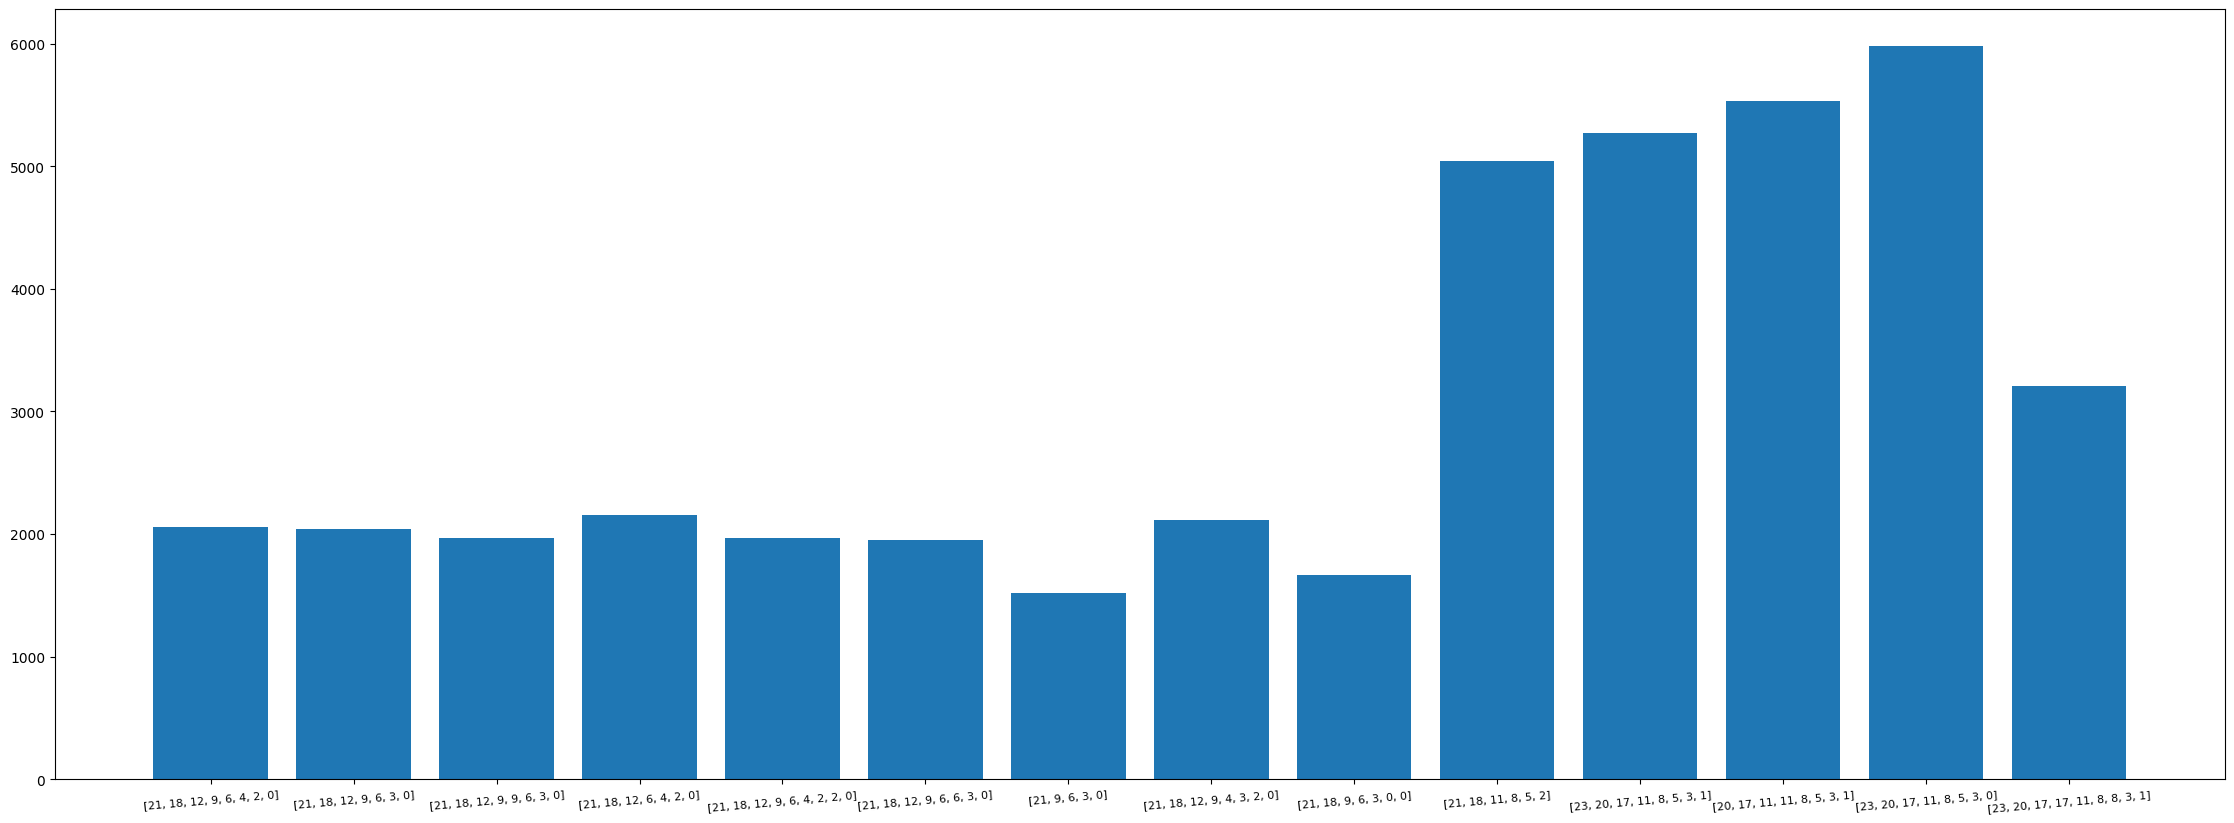

In [712]:
plt.figure(figsize=(28,10))
plt.bar(answer_dict.keys(), answer_dict.values())
plt.xticks(fontsize=8, rotation=5)
plt.show()

Text Analyzing

In [487]:
select['len'] = select['text'].apply(len)

In [488]:
for index,row in select.iterrows():
    print(row['len'])

227
230
218
162
204
266
251
136
285
297
171
289
664
195
267
95
223
264
237
305
137
278
216
109
189
216
269
163
57
268
69
168
242
258
236
88
217
90
246
197
236
189
75
133
61
319
159
315
248
62
194
171
268
254
181
139
234
258
171
228
220
219
162
257
128
272
288
76
235
248
248
298
242
249
237
83
432
239
199
239
68
202
90
223
188
221
275
308
52
154
78
274
218
276
295
222
267
135
585
223
374
234
242
308
258
119
290
371
294
308
62
245
17
218
180
224
277
254
309
153
290
249
89
255
213
235
212
124
266
237
79
211
193
223
170
118
159
204
96
262
322
102
262
92
210
272
217
244
73
263
355
75
193
299
175
244
81
223
208
143
281
302
236
361
243
211
228
58
216
196
169
180
131
98
278
77
201
275
235
229
81
185
180
130
216
319
199
94
162
269
220
172
154
219
247
94
148
141
291
240
249
149
90
237
163
286
237
222
144
361
144
165
255
152
275
328
193
251
199
319
303
120
167
156
257
236
212
212
218
105


In [281]:
a = select['link'].notnull()
a

0       True
1       True
2       True
3       True
4      False
       ...  
225     True
226     True
227    False
228     True
229    False
Name: link, Length: 230, dtype: bool

In [489]:
value_counts = select['topic'].value_counts()

count_df = pd.DataFrame({'topic': value_counts.index, 'Count': value_counts.values})
count_df

topic  Count
0             Travel     68
1  History & Culture     47
2            Animals     39
3            Science     35
4        Environment     21
5        Photography     12
6   History Magazine      6
7           Magazine      2

In [490]:
a = select[select['topic'].isna()]
print(len(a))

0


In [491]:
a = select[select['topic'].notna()]
print(len(a))

230


In [492]:
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   time            230 non-null    datetime64[ns]
 1   likes           230 non-null    int64         
 2   comments        230 non-null    int64         
 3   reactions       230 non-null    object        
 4   reaction_count  230 non-null    int64         
 5   image           47 non-null     object        
 6   video           29 non-null     object        
 7   link            171 non-null    object        
 8   text            230 non-null    object        
 9   shares          230 non-null    int64         
 10  post_url        230 non-null    object        
 11  topic           230 non-null    object        
 12  processed_text  221 non-null    object        
 13  hours           230 non-null    int32         
 14  engagement      230 non-null    int64         
 15  day   

In [503]:
grouped_data = select.groupby('topic').agg(total_engagement=('engagement', 'sum'),
                                     post_count=('engagement', 'size')).reset_index()

grouped_data['average_engagement'] = grouped_data['total_engagement'] / grouped_data['post_count']

In [504]:
grouped_data

topic  total_engagement  post_count  average_engagement
0            Animals            182935          39         4690.641026
1        Environment             47563          21         2264.904762
2  History & Culture             73336          47         1560.340426
3   History Magazine              4963           6          827.166667
4           Magazine              1469           2          734.500000
5        Photography             78528          12         6544.000000
6            Science             32803          35          937.228571
7             Travel            467287          68         6871.867647

History & Culture


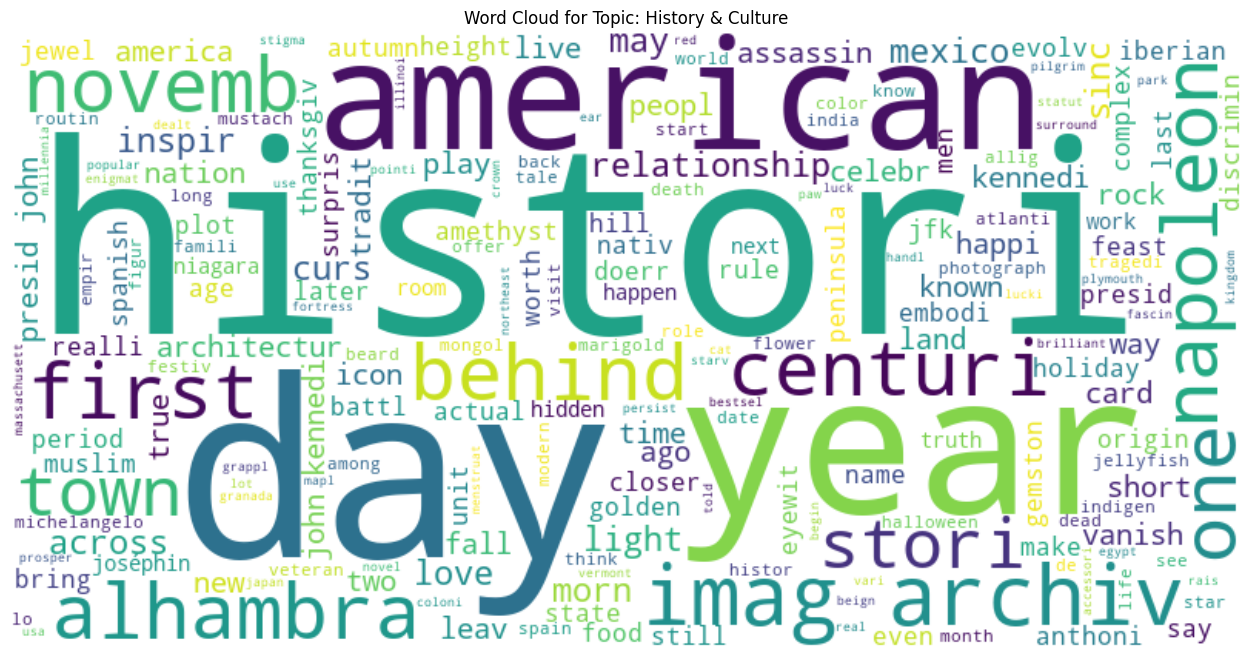

Environment


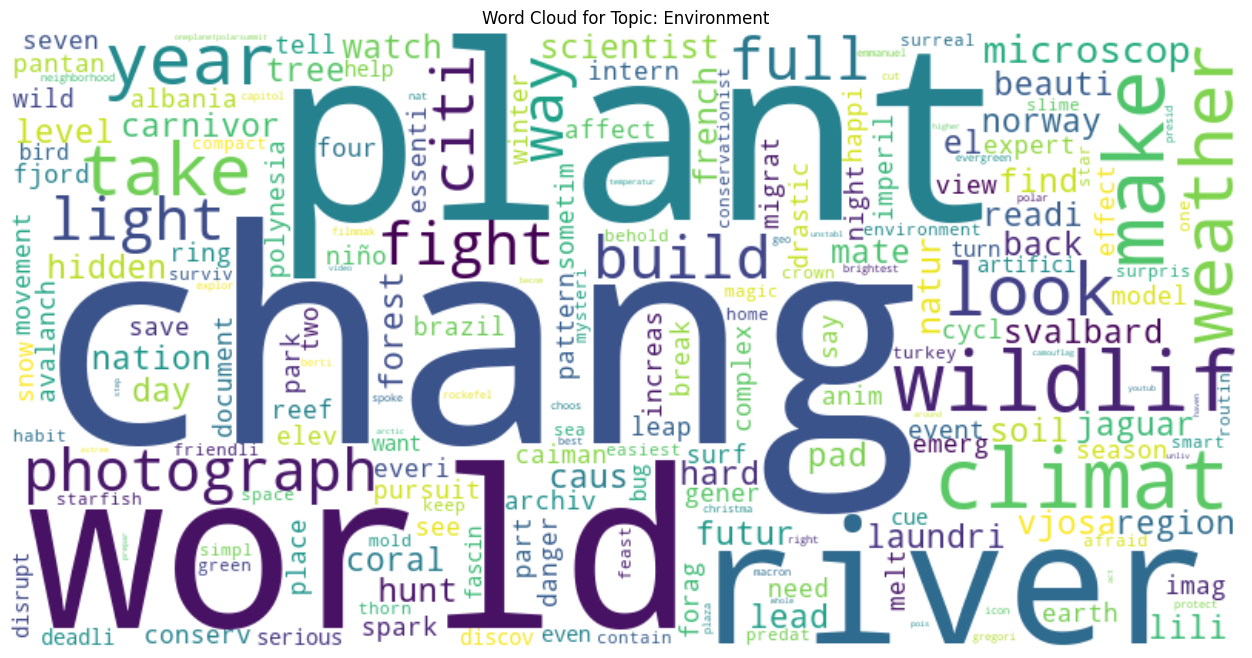

Travel


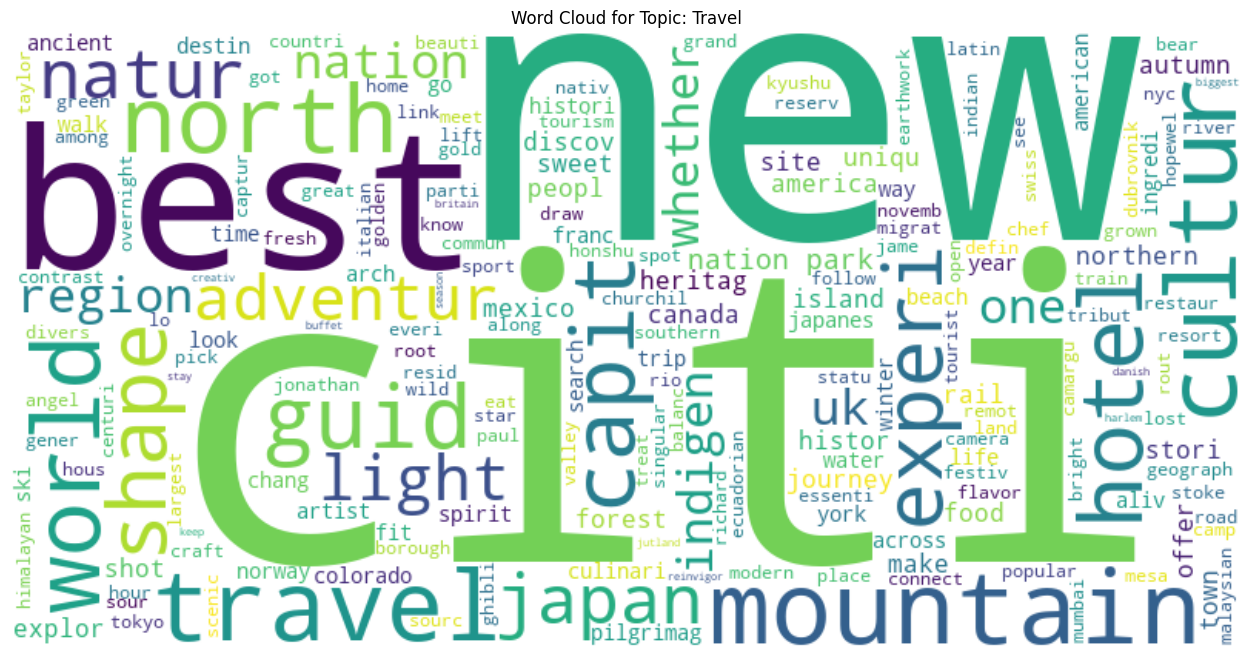

Science


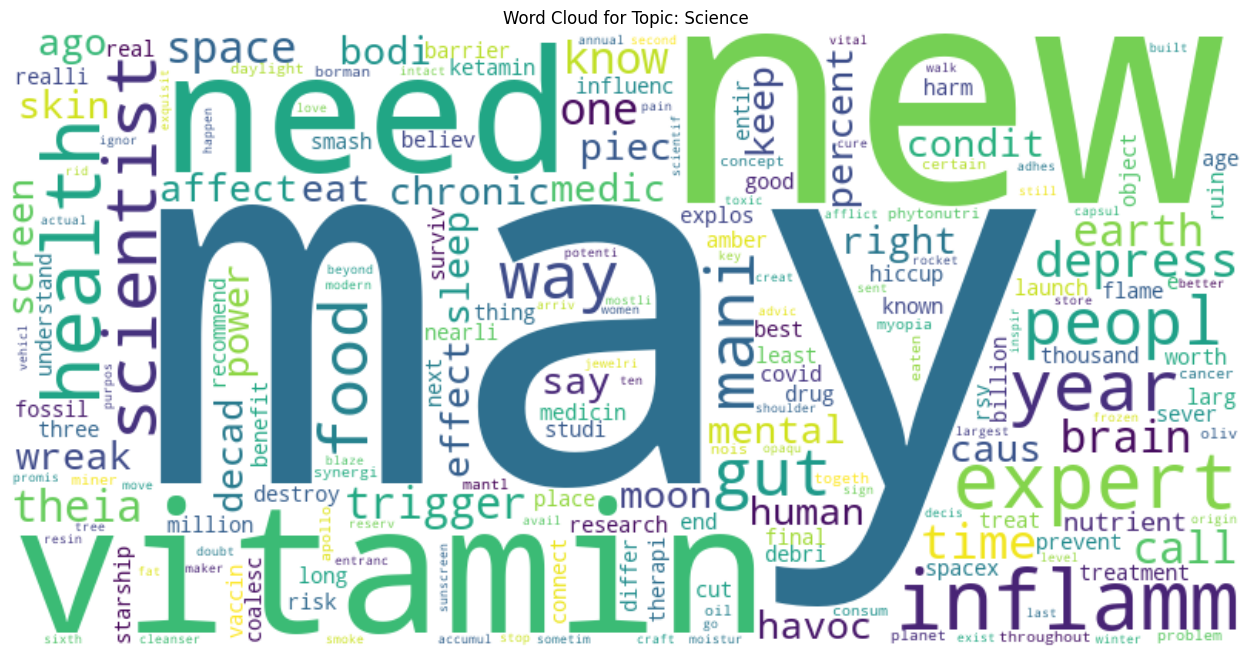

Animals


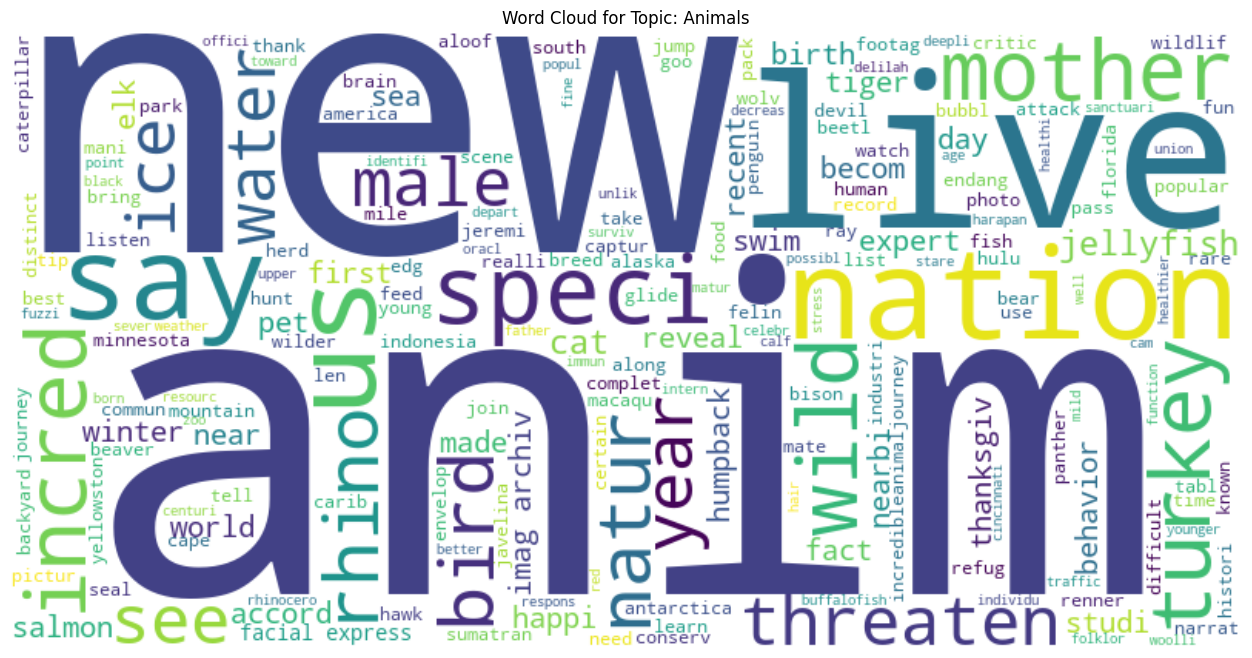

History Magazine


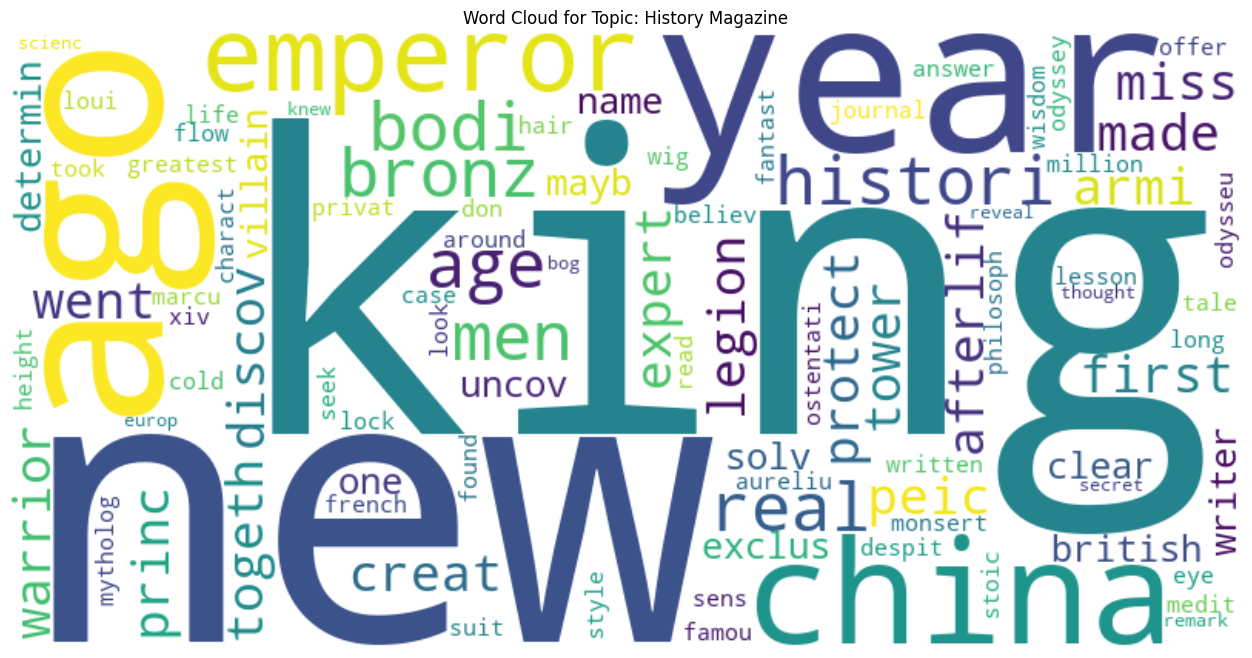

Photography


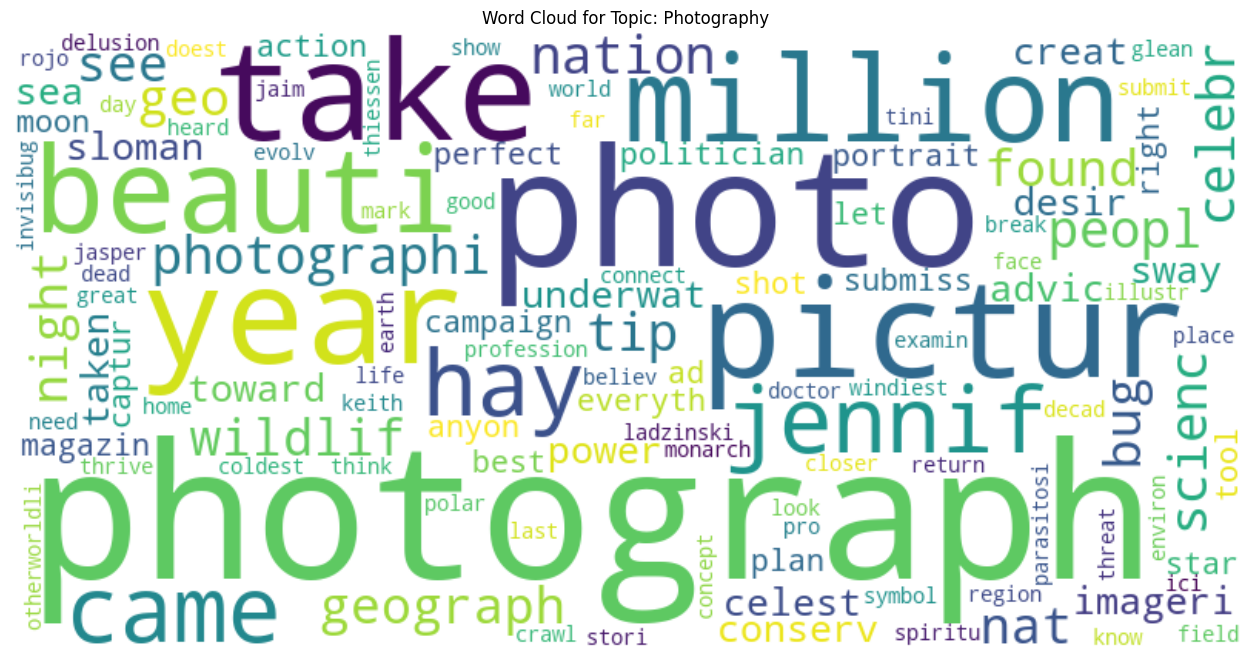

Magazine


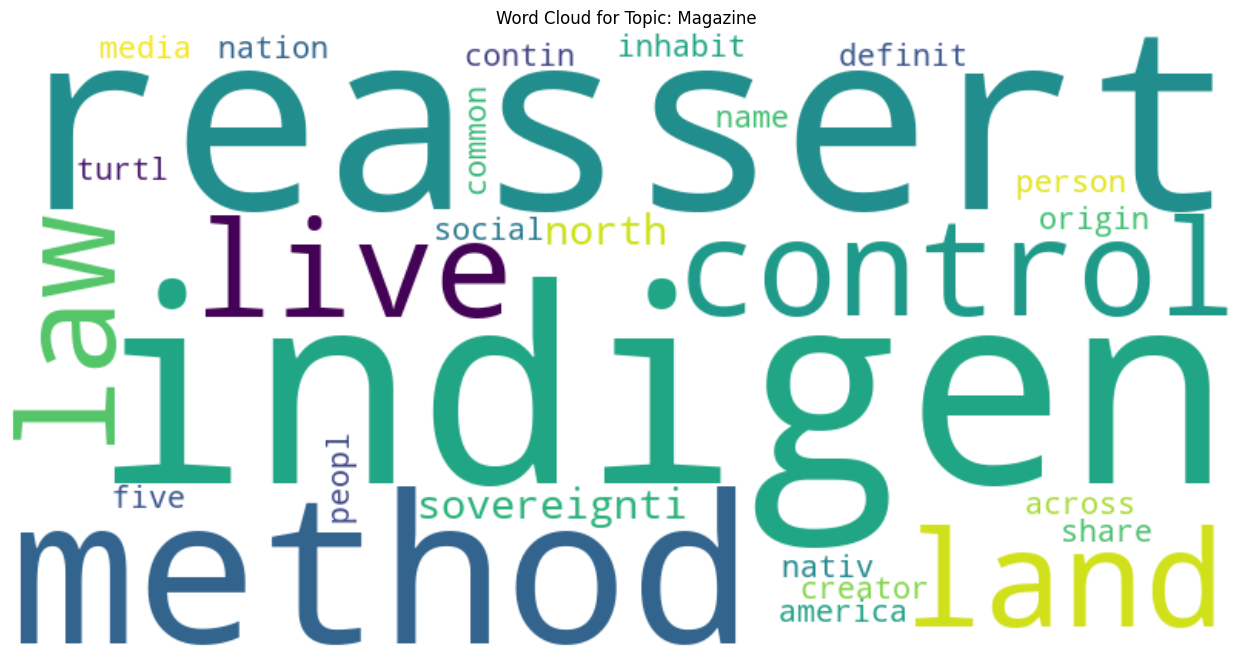

In [825]:
topics = select['topic'].unique()

for topic in topics:
    # Create a subset DataFrame for the current topic
    print(topic)
    subset_df = select[select['topic'] == topic]

    # Combine the processed text for all posts in the current topic
    combined_text = ' '.join(subset_df['processed_text'])

    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

    # Plot the word cloud using Seaborn
    plt.figure(figsize=(20, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Topic: {topic}')
    plt.axis('off')
    plt.show()

In [725]:
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   time            230 non-null    datetime64[ns]
 1   likes           230 non-null    int64         
 2   comments        230 non-null    int64         
 3   reactions       230 non-null    object        
 4   reaction_count  230 non-null    int64         
 5   image           47 non-null     object        
 6   video           29 non-null     object        
 7   link            171 non-null    object        
 8   text            230 non-null    object        
 9   shares          230 non-null    int64         
 10  post_url        230 non-null    object        
 11  topic           230 non-null    object        
 12  processed_text  230 non-null    object        
 13  engagement      230 non-null    int64         
 14  hours           230 non-null    int32         
 15  day   

In [820]:
select['link_value'] = select['link'].notna().astype(int)
select['image_value'] = select['image'].notna().astype(int)
select['video_value'] = select['video'].notna().astype(int)

<Axes: >

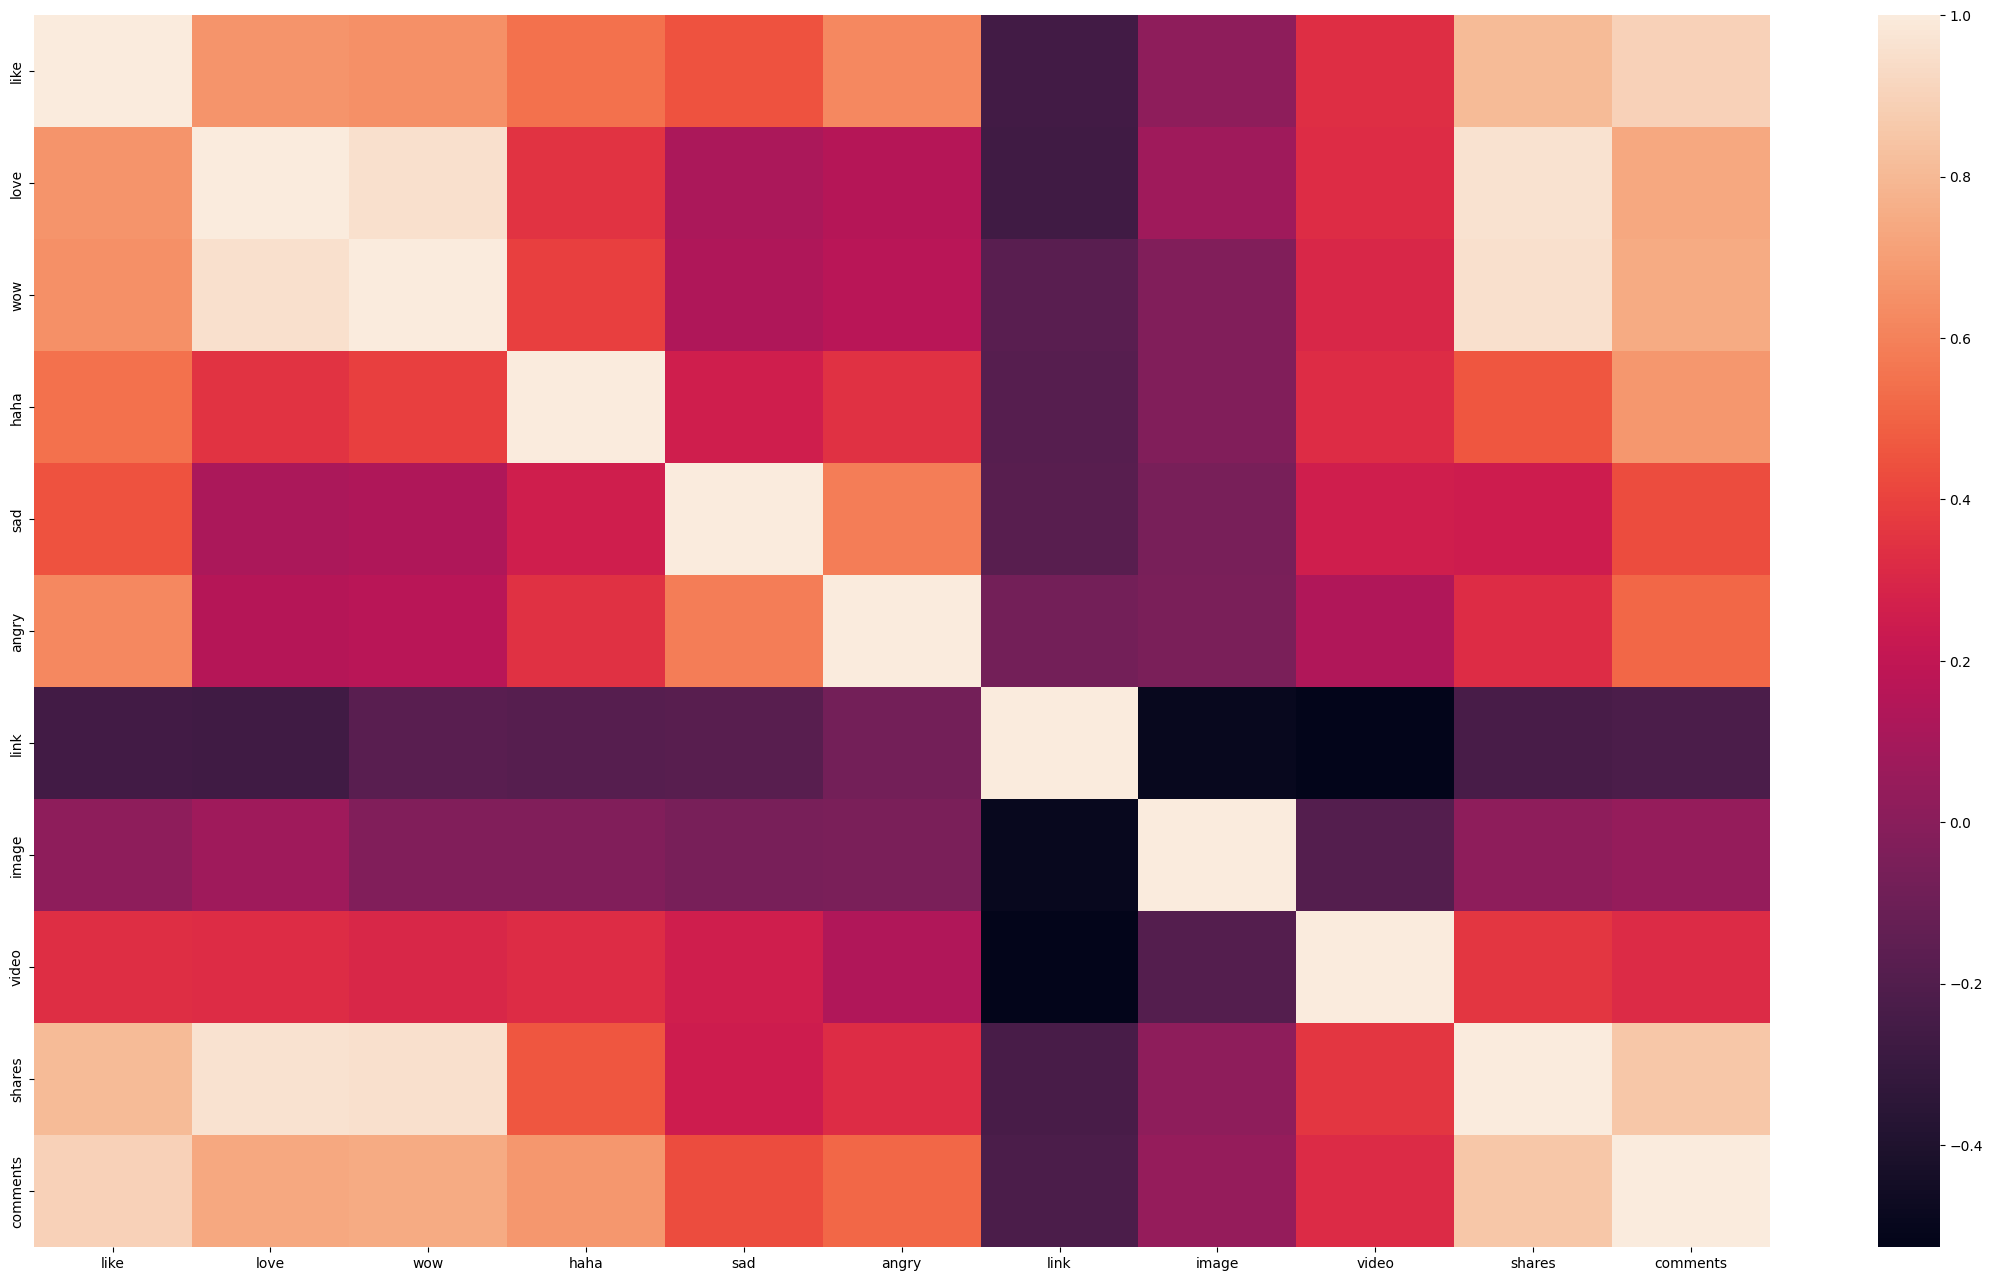

In [824]:
import seaborn as sns
corrleation_select = pd.DataFrame({'like':select['like'], 'love': select['love'], 'wow': select['wow'], 'haha':select['haha'], 'sad':select['sad'], 'angry':select['angry'],'link':select['link_value'],'image':select['image_value'],'video':select['video_value'],'shares':select['shares'],'comments':select['comments']})
corrleation_plt = corrleation_select.corr()
round(corrleation_plt,2)
plt.figure(figsize=(28,16))
sns.heatmap(corrleation_plt)